<h1> College Basketball </h1>

<h2> Introduction </h2>

<p>
    For my first dataset, I selected the College BasketBall Dataset as I am interested in sports and have a small amount of knowledge of college basketball. I thought it would be interesting to see what insights I could find from this dataset.
</p>

<h3>
    College BasketBall Dataset Information.
</h3> 

<p> I mainly worked on the "cbb.csv" dataset which consisted of the Data from the 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023 Division I college basketball seasons. The 2020 season was excluded from this dataset since there was no Postseason due to the Covid-19 pandemic. I was able to use the cbb2020 data set which consisted of Rankings for each Division 1 college basketball.  </p>

<p>I found this dataset on Kaggle and was created by Andrew Sundberg </p>

<strong>Cbb.csv column Information (2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022 and 2023 seasons) </strong>
<ul>
<li>TEAM: The Division I college basketball school</li>

<li>CONF: The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)</li>

<li>G: Number of games played</li>

<li>W: Number of games won</li>

<li>ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)</li>

<li>ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)</li>

<li>BARTHAG: Power Rating (Chance of beating an average Division I team)</li>

<li>EFG_O: Effective Field Goal Percentage Shot</li>

<li>EFG_D: Effective Field Goal Percentage Allowed</li>

<li>TOR: Turnover Percentage Allowed (Turnover Rate)</li>

<li>TORD: Turnover Percentage Committed (Steal Rate)</li>

<li>ORB: Offensive Rebound Rate</li>

<li>DRB: Offensive Rebound Rate Allowed</li>

<li>FTR : Free Throw Rate (How often the given team shoots Free Throws)</li>

<li>FTRD: Free Throw Rate Allowed</li>

<li>2P_O: Two-Point Shooting Percentage</li>

<li>2P_D: Two-Point Shooting Percentage Allowed</li>

<li>3P_O: Three-Point Shooting Percentage</li>

<li>3P_D: Three-Point Shooting Percentage Allowed</li>

<li>ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)</li>

<li>WAB: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)</li>

<li>POSTSEASON: Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)</li>

<li>SEED: Seed in the NCAA March Madness Tournament</li>

<li>YEAR: Season</li>

</ul>

<strong>Cbb20.csv column Information (2020 season) </strong>
<ul>

<li>RK (Only in cbb20): The ranking of the team at the end of the regular season according to barttorvik. link (https://barttorvik.com/#)</li>
<p>Consists of the same columns as the cbb.csv dataset besides POSTSEASON and SEED as the postseason didn't take place in the 2020 season</p>


</ul>

</p><strong>Link To College Basketball dataset on Kaggle: https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset</strong></p>

<h2>Data Preprocessing</h2>

In [5]:
import numpy as np
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import seaborn as sns #To visualise
import matplotlib.pyplot as plt  # To visualize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error,accuracy_score, classification_report
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import entropy


In [6]:
#reading in the cbb.csv file
basketBallData= pd.read_csv("ProjectData/cbb.csv")


In [7]:
basketBallData.dtypes #checking column data types

TEAM           object
CONF           object
G               int64
W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG_O         float64
EFG_D         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON     object
SEED          float64
YEAR            int64
dtype: object

<p>I checked the data types of all the columns in the dataset in which I was happy enough with and did't make any changes</p>

In [9]:
#checking for null values in all of the columns in the data set
basketBallData.isnull().sum()


TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    2843
SEED          2843
YEAR             0
dtype: int64

<p>There was 2843 missing values in the POSTSEASON and SEED columns in which I assumed that they were teams that didn't qualify for the postseason</p>

In [11]:
basketBallData['POSTSEASON'].fillna("DQ", inplace=True)#replacing all missing values in the Postseason column with "DQ"
basketBallData['SEED'].fillna("DQ", inplace=True)#replacing all missing values in the Seed column with "DQ"
basketBallData[['POSTSEASON', 'SEED']] #displaying the updated columns

C:\Users\johnp\AppData\Local\Temp\ipykernel_29780\1936980734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  basketBallData['POSTSEASON'].fillna("DQ", inplace=True)#replacing all missing values in the Postseason column with "DQ"
C:\Users\johnp\AppData\Local\Temp\ipykernel_29780\1936980734.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

POSTSEASON SEED
0           2ND  1.0
1           2ND  1.0
2           2ND  3.0
3           2ND  3.0
4           2ND  1.0
...         ...  ...
3518         DQ   DQ
3519         DQ   DQ
3520         DQ   DQ
3521         DQ   DQ
3522         DQ   DQ

[3523 rows x 2 columns]

<p><strong> I filled these empty values with "DQ" which meant "Didn't Qualify" </strong></p>

In [13]:
basketBallData.describe(include="all") #displaying a quick summary of the dataset

TEAM  CONF            G            W        ADJOE  \
count             3523  3523  3523.000000  3523.000000  3523.000000   
unique             368    35          NaN          NaN          NaN   
top     North Carolina   ACC          NaN          NaN          NaN   
freq                10   147          NaN          NaN          NaN   
mean               NaN   NaN    30.486233    15.990633   103.151320   
std                NaN   NaN     3.951584     6.572893     7.264859   
min                NaN   NaN     5.000000     0.000000    76.600000   
25%                NaN   NaN    29.000000    11.000000    98.200000   
50%                NaN   NaN    31.000000    16.000000   102.800000   
75%                NaN   NaN    33.000000    21.000000   107.900000   
max                NaN   NaN    40.000000    38.000000   129.100000   

              ADJDE      BARTHAG        EFG_O        EFG_D          TOR  ...  \
count   3523.000000  3523.000000  3523.000000  3523.000000  3523.000000  ...   
unique          NaN          NaN          NaN          NaN          NaN  ...   
top             NaN          NaN          NaN          NaN          NaN  ...   
freq            NaN          NaN          NaN          NaN          NaN  ...   
mean     103.153250     0.494067    49.887823    50.087113    18.696509  ...   
std        6.511989     0.255338     3.078505     2.894967     2.104119  ...   
min       84.000000     0.005000    39.200000    39.600000    11.900000  ...   
25%       98.400000     0.281300    47.900000    48.100000    17.300000  ...   
50%      103.200000     0.475600    49.800000    50.100000    18.600000  ...   
75%      107.800000     0.714250    51.900000    52.000000    20.000000  ...   
max      124.000000     0.984200    61.000000    60.100000    27.100000  ...   

               FTRD         2P_O         2P_D         3P_O         3P_D  \
count   3523.000000  3523.000000  3523.000000  3523.000000  3523.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      34.802555    49.112433    49.289299    34.185580    34.369316   
std        6.396757     3.400389     3.317012     2.729186     2.435546   
min       16.500000    37.700000    37.700000    24.900000    26.100000   
25%       30.200000    46.800000    47.100000    32.300000    32.700000   
50%       34.100000    49.000000    49.300000    34.100000    34.300000   
75%       38.800000    51.300000    51.500000    36.000000    36.000000   
max       60.700000    64.000000    61.200000    44.100000    43.100000   

              ADJ_T          WAB  POSTSEASON  SEED         YEAR  
count   3523.000000  3523.000000        3523  3523  3523.000000  
unique          NaN          NaN           9    17          NaN  
top             NaN          NaN          DQ    DQ          NaN  
freq            NaN          NaN        2843  2843          NaN  
mean      67.735339    -7.579620         NaN   NaN  2017.828555  
std        3.091703     6.815976         NaN   NaN     3.257824  
min       57.200000   -25.200000         NaN   NaN  2013.000000  
25%       65.700000   -12.600000         NaN   NaN  2015.000000  
50%       67.700000    -7.900000         NaN   NaN  2018.000000  
75%       69.700000    -3.000000         NaN   NaN  2021.000000  
max       83.400000    13.100000         NaN   NaN  2023.000000  

[11 rows x 24 columns]

<p><strong>I displayed a summary of the dataset to get a quick understanding of the data.</strong></p>

In [15]:
basketBallData.duplicated().sum()#checking for any duplicated data




0

<p><strong>I checked for any duplicated data in the data set in which there was none</strong></p>

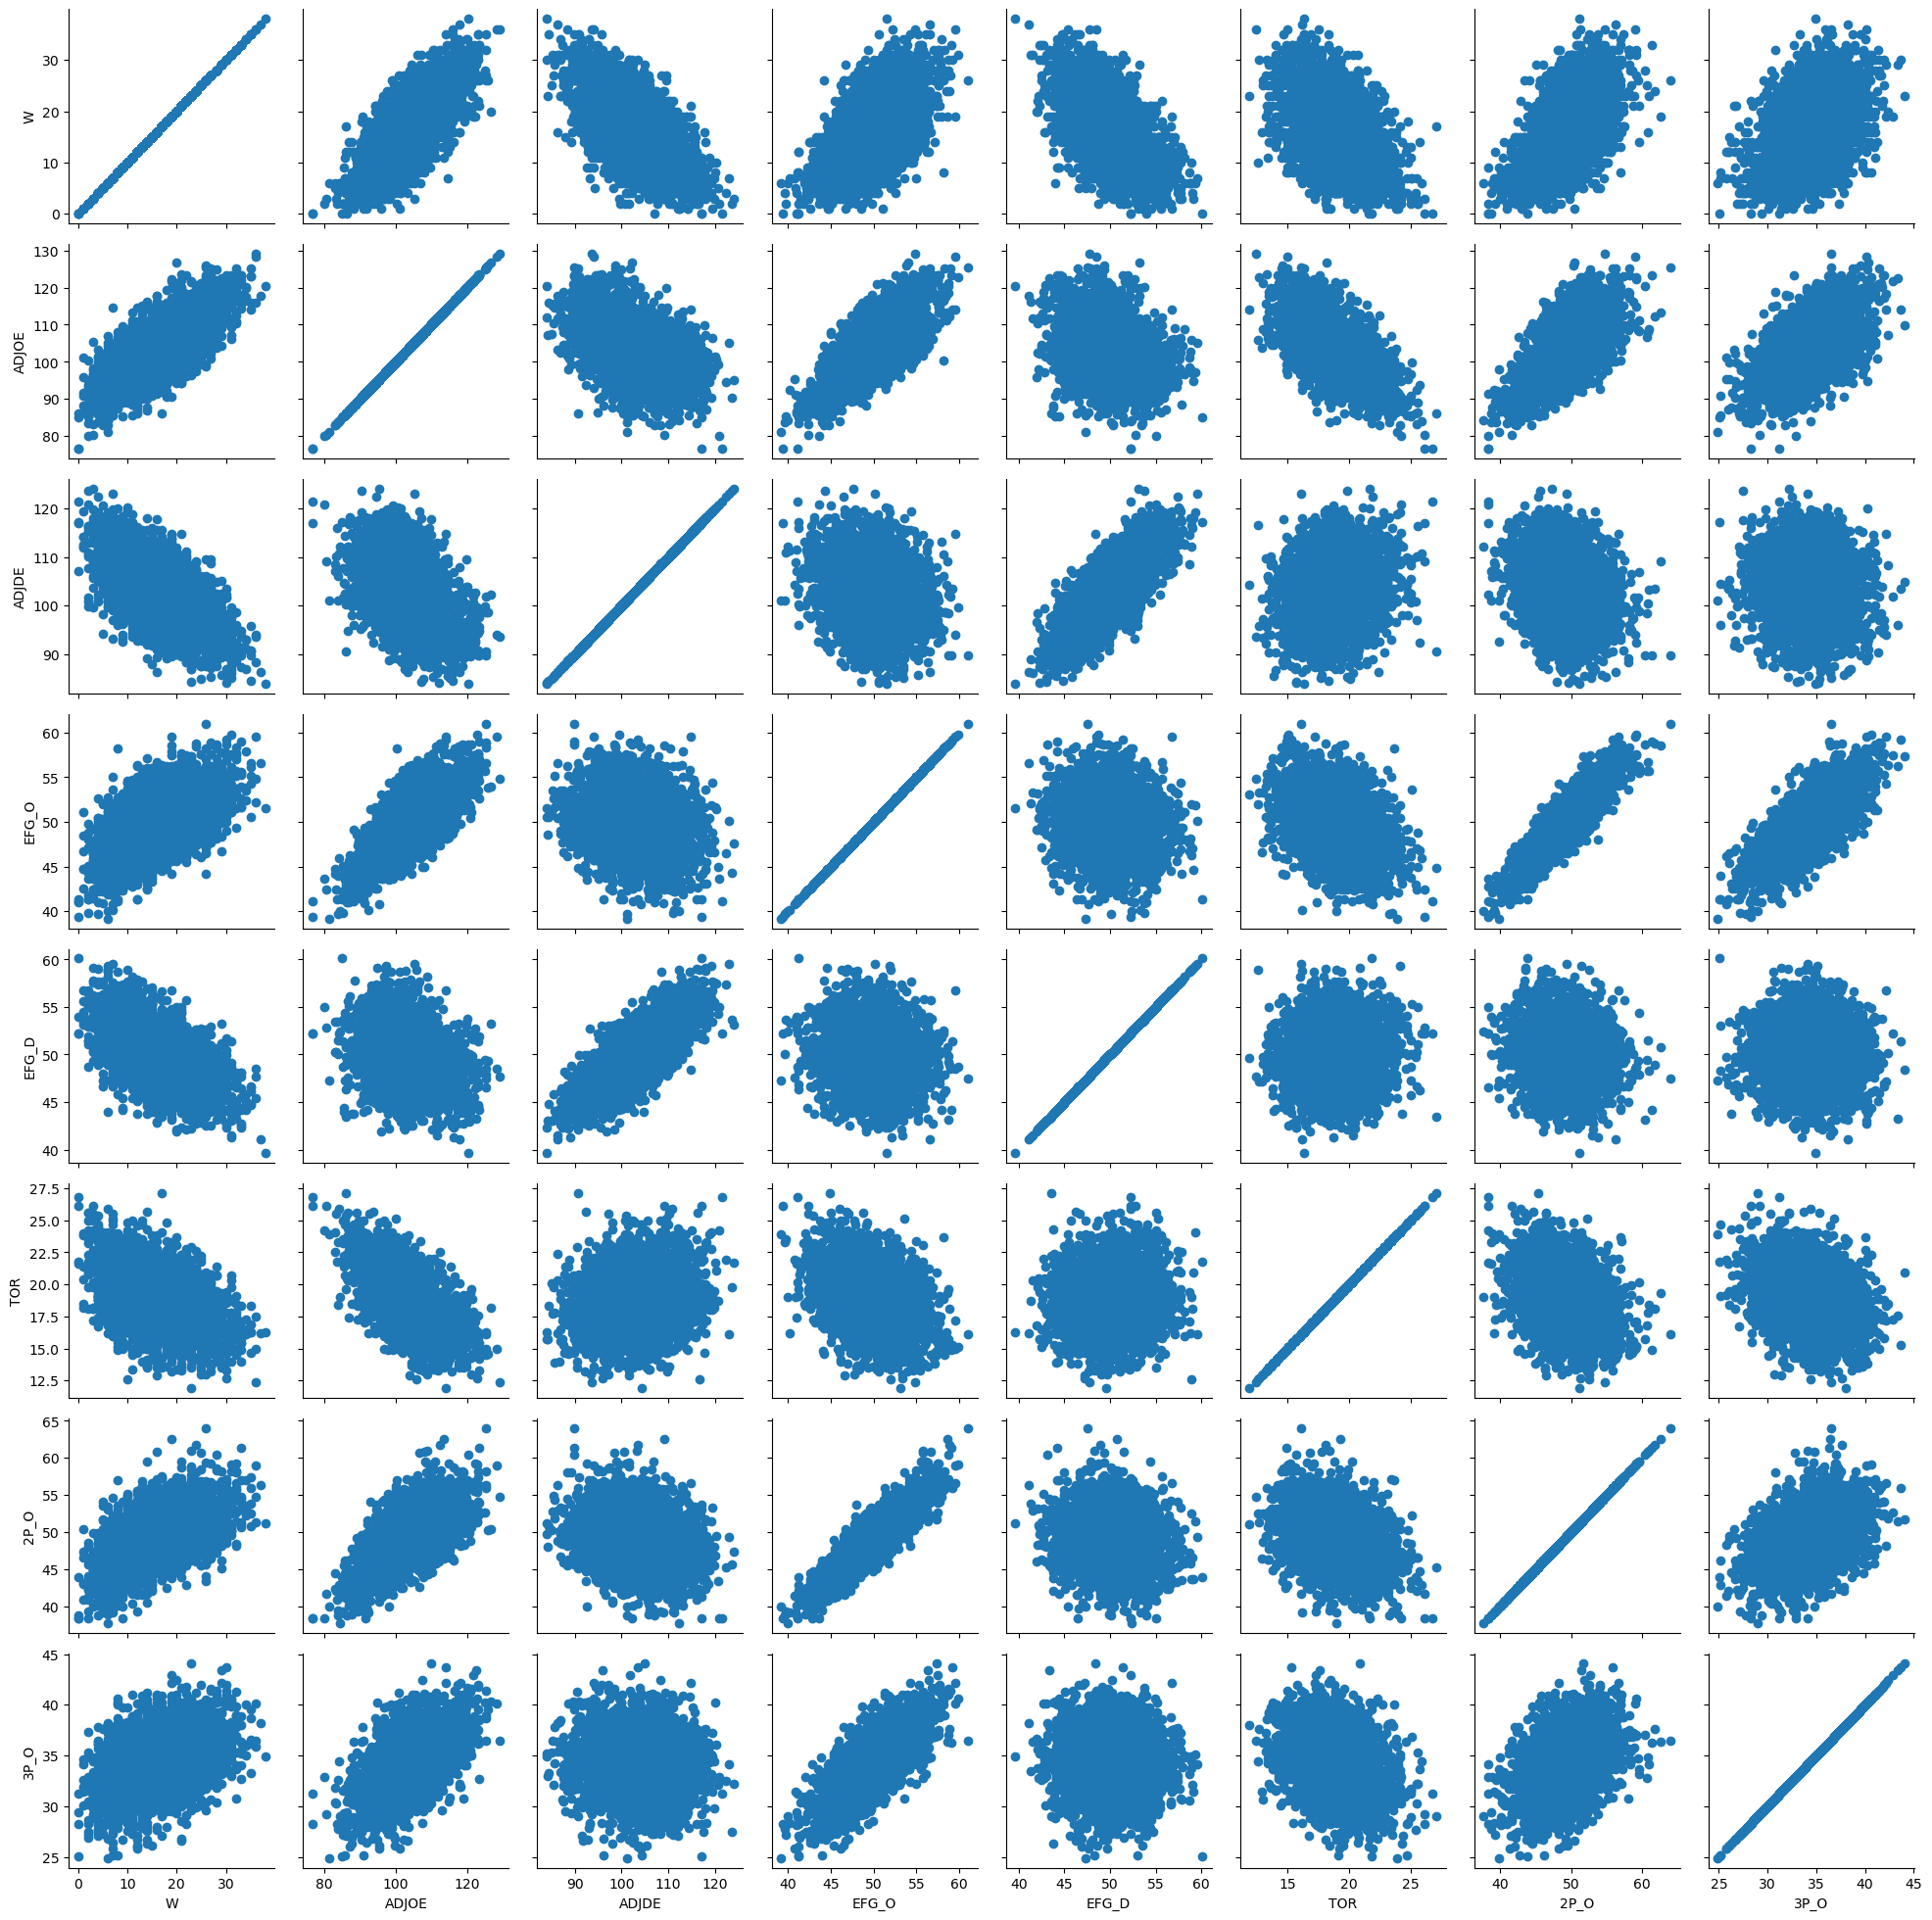

In [17]:
sns.PairGrid(basketBallData,vars=["W","ADJOE", "ADJDE", "EFG_O", "EFG_D", "TOR","2P_O", "3P_O"]).map(plt.scatter)
#creating a PairGrid to see relationsships Wins and ADJOE, ADJDE, EFG_O, EFG_D, TOR,2P_O, 3P_O
            

<h2>Do Teams with a good Adjusted Offensive Efficency  tend to win more games and perform better in the postseason than teams with a good Adjusted Defensive Efficiency ?</h2>

<p>I looked at the pair grid I created above and noticed that the ADJOE (Adjusted Offensive Efficency) and ADJDE (Adjusted Defensive Efficiency) variables have a good relationship with the W (number of wins) variable.</p> <p> The Adjusted Offensive Efficency is an estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense and the    Adjusted Defensive Efficiency is an  estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense </p>

<p> I thought it would be interesting comparing the Top 100 teams with the highest ADJOE values which means the highest estimated points scored per 100 posessions and compared them to a 100 teams with the lowest ADJDE which means the lowest estimated points allowed per 100 posessions and see who got the most wins and how far they reached in the postseason. These teams were selected from the combined 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022 and 2023 seasons (cbb.csv) </p>

<p>for the top 100 ADJDE teams, I selcted 100 teams with the lowest ADJDE (Adjusted Defensive Efficiency) values as this would mean the estimated lowest amount of points conceded per 100 posessions which is a good thing.</p>

In [20]:
#creating a data frame which consists of the Top 100 teams with the highest ADJOE
Top100ADJOE= basketBallData.sort_values(by="ADJOE", ascending = False)[:100] 
#creating a data frame which consists of 100 teams with lowest ADJDE
Top100ADJDE= basketBallData.sort_values(by="ADJDE")[:100]



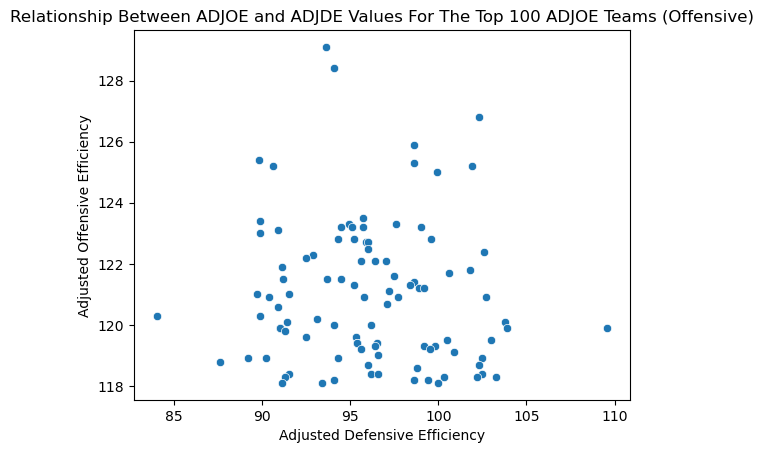

In [21]:
#adding a Dataset column and concatinating them together so that they can be displayed on the same graph
Top100ADJOE['DataSet']="Offense"
Top100ADJDE["DataSet"]= "Defense"
offensiveAndDevensiveCombined= pd.concat([Top100ADJOE, Top100ADJDE])

#creating a scatter plot to visulaise the relationship between the ADJOE and ADJDE variables for the Top 100 offensive teams.
sns.scatterplot(data=Top100ADJOE, x=Top100ADJOE["ADJDE"], y= Top100ADJOE["ADJOE"])
plt.xlabel("Adjusted Defensive Efficiency")
plt.ylabel("Adjusted Offensive Efficiency")
plt.title("Relationship Between ADJOE and ADJDE Values For The Top 100 ADJOE Teams (Offensive)")
plt.show()

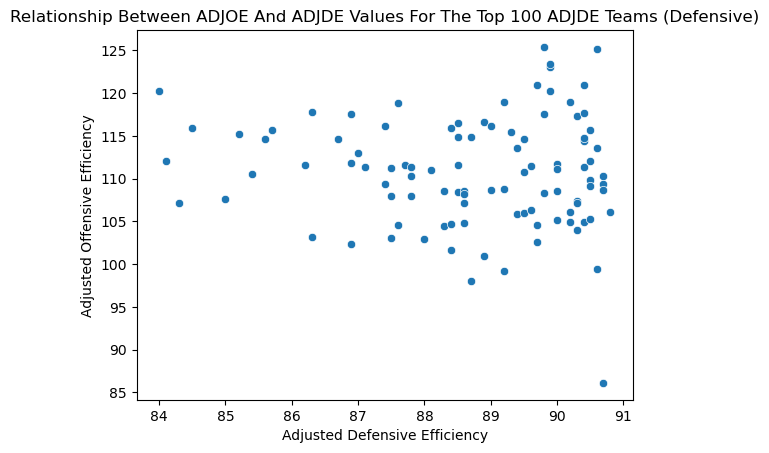

In [22]:
#creating a scatter plot to visulaise the relationship between the ADJOE and ADJDE variables for the Top 100 defensive teams.
sns.scatterplot(data=Top100ADJDE, x=Top100ADJDE["ADJDE"], y= Top100ADJDE["ADJOE"])
plt.title("Relationship Between ADJOE And ADJDE Values For The Top 100 ADJDE Teams (Defensive)")
plt.xlabel("Adjusted Defensive Efficiency")
plt.ylabel("Adjusted Offensive Efficiency")
plt.show()

<p>By looking at the two scatter plots above, there seems to be no relationship between the ADJOE and ADJDE variables for both the top 100 ADJOE teams and the top 100 ADJDE teams. </p>

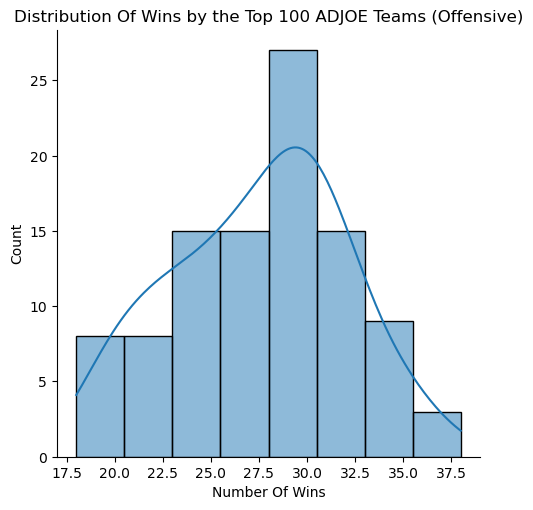

In [24]:
#creating a histogram displaying the distrubutaion of the number of wins for the top 100 ADJOE Teams(Offense)
sns.displot(data=Top100ADJOE["W"], kde=True )
plt.xlabel("Number Of Wins")
plt.title("Distribution Of Wins by the Top 100 ADJOE Teams (Offensive)")
plt.show()

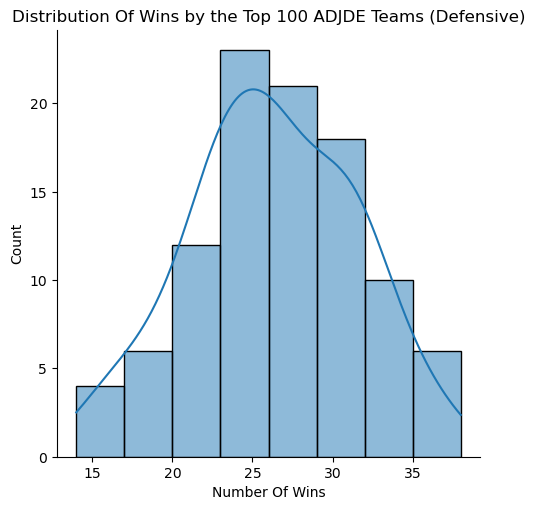

In [25]:
#creating a histogram displaying the distrubutaion of the number of wins for the top 100 ADJDE Teams(Defensive)
sns.displot(data=Top100ADJDE["W"], kde=True )
plt.xlabel("Number Of Wins")
plt.title("Distribution Of Wins by the Top 100 ADJDE Teams (Defensive)")
plt.show()

<p> <strong>According to the two histograms above, the teams with the highest Adjusted Offensive Efficiency have a highest frequency of around 30 wins per season with around 27 teams compared to the teams with the Adjusted Defensive Efficiency which have a highest frequency of around 25 wins in a season with around 24 teams. </strong></p>

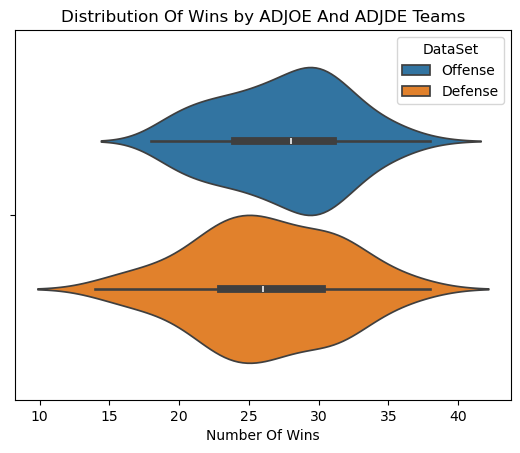

Average Amount of Wins (Offense): 27.5
Average Amount of Wins (Defense): 26.23


In [27]:
#creating a violinplot to display the distribution of wins by ADJOE and ADJDE teams.

sns.violinplot(x=offensiveAndDevensiveCombined["W"], hue= offensiveAndDevensiveCombined["DataSet"])
plt.xlabel("Number Of Wins")
plt.title("Distribution Of Wins by ADJOE And ADJDE Teams")
plt.show()
#displaying the average number of wins for the top 100 ADJOE (Offensive)teams 
print("Average Amount of Wins (Offense): "+str(Top100ADJOE["W"].mean()))

#displaying the average number of wins for the top 100 ADJDE (Defensive)teams 
print("Average Amount of Wins (Defense): "+str(Top100ADJDE["W"].mean()))

<p><strong>According to the two histograms above and the violin graph, the teams with the highest Adjusted Offensive Efficiency have a highest frequency of around 27-30 wins per season compared to the teams with the Adjusted Defensive Efficiency which have a highest frequency of around 24-25 wins in a season. </strong> </p>

<p><strong>I also displayed the average amount of wins in a season for the top 100 ADJOE (Offensive) teams and the top 100 ADJDE (Defensive) teams in which the Top 100 ADJOE teams had a higher average of 27.5 wins compared to the Top 100 ADJDE teams with 26.23.</strong></p>

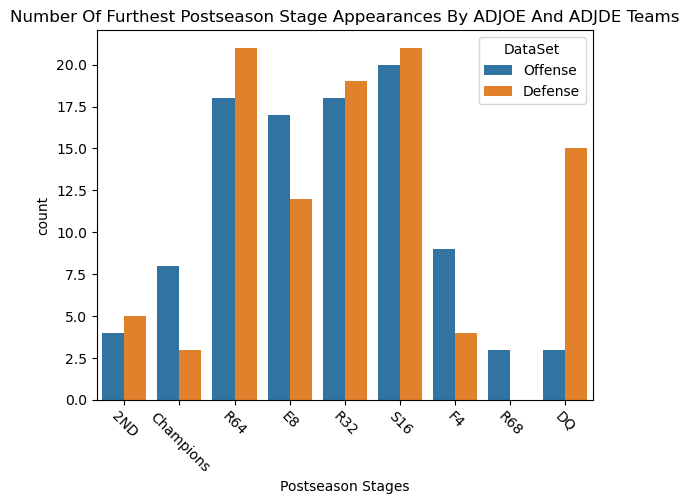

In [29]:
#creating a barchart to display the number Postseason appearances in each stage by ADJOE(Offensive) and ADJDE(Defensive) teams.
sns.countplot(x= "POSTSEASON", data= offensiveAndDevensiveCombined, hue = offensiveAndDevensiveCombined["DataSet"])
plt.xlabel("Postseason Stages")
plt.title("Number Of Furthest Postseason Stage Appearances By ADJOE And ADJDE Teams")
plt.xticks(rotation=-45)
plt.show()


<p><strong> * This graph counts the furthest stage a team reached. An example: Kansas reaches the final but they lose, this adds 1 to the "2nd" variable but it won't add 1 to the previous stages they were in such as Final 4, Elite 8 etc.</strong></p>

<ul>
    <li><strong> DQ:</strong>Didn't Qualify</li>
    <li><strong> R68:</strong>First Four</li>
    <li><strong> R64:</strong>Round Of 64</li>
    <li><strong> R32:</strong>Round Of 32</li>
    <li><strong> S16:</strong>Sweet 16</li>
    <li><strong> E8:</strong>Elite 8</li>
    <li><strong> F4:</strong>Final Four</li>
    <li><strong> 2nd:</strong>Runner-up</li>
    <li><strong> Champions:</strong>Winners of the March-Madness Tournament</li>
</ul>

<p>According to the barchart above, teams with a higher adjusted offensive efficiency dataset have a smaller amount of teams that didn't qualify for the post season compared to the adjusted defensive efficiency dataset. They also have a higher amount of teams that reached First Four (R68), Elite 8(E8), Final 4 (F4) before being eliminated, and also more adjusted offensive effciency teams becoming champions.   </p>

<p> According to the data exploration I carried out on top 100 teams with the best Adjusted Offensive Efficiency (ADJOE) and the top 100 teams with the best Adjusted Defensive Efficiency (ADJDE), I belive that teams with a good Adjusted Offensive Efficiency achieve more wins and perform better in the postseason than teams with a good adjusted defensive efficiency value.</p>

<h2> Who Is More succesful? Teams That Have A Higher 2pt Completion Percentage or Teams With A Higher 3pt Completion Percentage </h2>

<p>I was curious to see what teams are more successful, Teams that have a high 2pt completion percentage or teams with a high 3 pt completion percentage. Similar to what i did for teams with a good ADJOE (Adjusted Offensive Efficency) and teams with a good ADJDE (Adjusted Defensive Efficency). I created the Top 100 teams with the highest 2pt scoring percentage and the top 100 teams with the highest 3pt scoring percentage.</p>

<p> I then compared the two datasets on how many wins they achieved in a season and the stages they reached in the postseason.</p>

<p>These teams were selected from the combined 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022 and 2023 seasons (cbb.csv)</p>

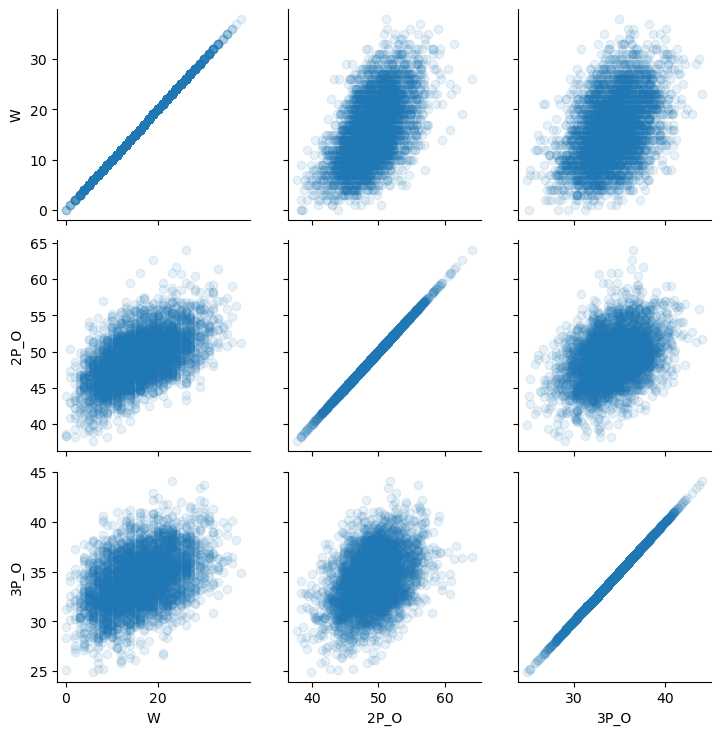

In [34]:
#creating a PairGrid to see relationships between the number of wins 2point scoring percentage and 3 pt scoring percentage.
sns.PairGrid(basketBallData,vars=["W","2P_O", "3P_O"]).map(plt.scatter, alpha= 0.1)

            

<p><strong>It seems that there is a slightly more positive correlation with the 2pt scoring percentage with a number of wins compared to the 3pt scoring percentage.</strong></p> 

<p><strong>I created two dataframes that contain the top 100 teams with the highest 2 pt scoring percentage and the top 100 teams with the highest 3pt scoring percentage from the combined 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022 and 2023 seasons and compared how succesful they were in terms of winning and the the furthest stages they reached in the postseason. </strong></p>

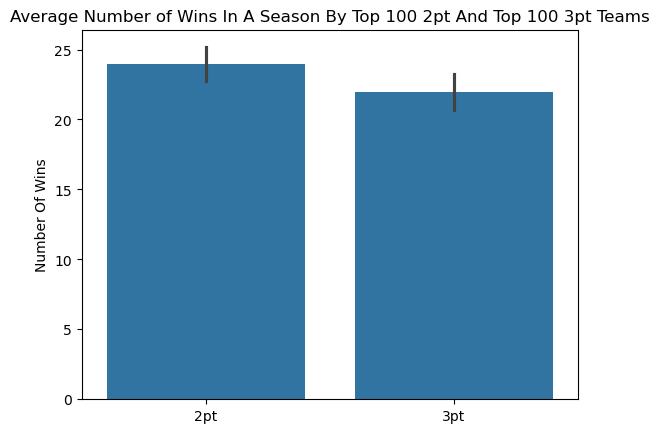

In [37]:
#creating a dataset of the top 100 teams with the highest 2pt scoring percentage.
Top1002pt= basketBallData.sort_values(by="2P_O", ascending = False)[:100]
Top1002pt['DataSet']="2pt"

#creating a dataset of the top 100 teams with the highest 3pt scoring percentage.
Top1003pt= basketBallData.sort_values(by="3P_O", ascending = False)[:100]
Top1003pt["DataSet"]= "3pt"

#adding a Dataset column and concatinating them together so that they can be displayed on the same graph 
Top1002pt['DataSet']="2pt"
Top1003pt["DataSet"]= "3pt"
ThreeptTwoptcombined= pd.concat([Top1002pt, Top1003pt])

#creating a barchart to display the average number of wins in a season by the Top 100 2pt and the top 100 3pt teams
sns.barplot(x=ThreeptTwoptcombined["DataSet"], y=ThreeptTwoptcombined["W"])
plt.ylabel("Number Of Wins")
plt.title("Average Number of Wins In A Season By Top 100 2pt And Top 100 3pt Teams")
plt.xlabel("")
plt.show()

<p><strong>According to barchart above, the teams with the highest 2pt scoring percentage have a higher average number of wins in a season at around 24 wins compared to the teams with the highest 3pt scoring percentage which have a an average of about 22 wins in a season</strong></p>



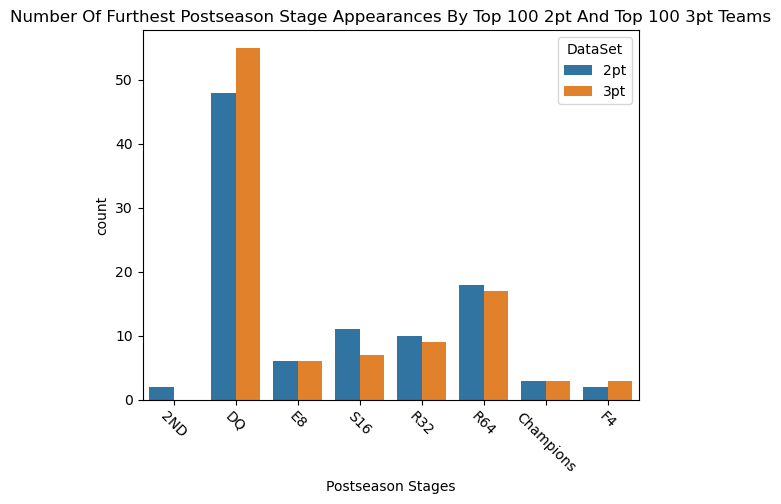

In [39]:
#creating a #creating a barchart to display the number Postseason appearances in each stage by the highest 2pt scoring teams and the highest 3pt scoring teams.
sns.countplot(x= "POSTSEASON", data=ThreeptTwoptcombined, hue = "DataSet")
plt.xlabel("Postseason Stages")
plt.title("Number Of Furthest Postseason Stage Appearances By Top 100 2pt And Top 100 3pt Teams")
plt.xticks(rotation=-45)
plt.show()


<ul>
    <li><strong> DQ:</strong>Didn't Qualify</li>
    <li><strong> R64:</strong>Round Of 64</li>
    <li><strong> R32:</strong>Round Of 32</li>
    <li><strong> S16:</strong>Sweet 16</li>
    <li><strong> E8:</strong>Elite 8</li>
    <li><strong> F4:</strong>Final Four</li>
    <li><strong> 2nd:</strong>Runner-up</li>
    <li><strong> Champions:</strong>Winners of the March-Madness Tournament</li>
</ul>

<p><strong> * No R68 (First Four) as I'm assuming neither teams got knocked out at that stage</strong></p>

<p><strong>According to the barchart, the same amount of high 2pt scoring teams and high 3pt scoring teams won the same amount of championships and appearances in the Elite 8 round, but there was more postseason appearances in the round of 64 (R64), round of 32(R32), Sweet 16 and more runner-ups for teams with a high two-point completion percentage compared to teams with a high three point completion percentage.</strong></p> 

<p><strong> In my opinion, it looks like that teams that have a high two-point scoring percentage seem to achieve more wins and go on a deeper run in the postseason than teams that have a high 3pt completion percentage.</strong></p>

<h2>Model building to predict the rankings of Division 1 College BasketBall Teams in the 2020 season. </h2>

<p> I decided to build models to predict the Rankings of a Division 1 College Basketball Teams in the 2020 season.</p>

<p>The "RK" variable is the ranking of a Division 1 college basketball team at the end of the regular season. </p>

<p>The rankings was only recorded in the "cbb20.csv" dataset which contains data from the 2020 Division 1 college basketball season, these contain the same columns in the cbb.csv file except for the POSTSEASON and SEED as the postseason didnt take place in the 2020 season. </p>

<p> The highest ranked team will have a ranking number of 1 and the lowest ranked team will have a ranking number of 353, so the lower the ranking number is, the better. </p>

<p> </p>

In [334]:
#reading in the cbb20.csv dataset.
twentyBasketBallData= pd.read_csv("ProjectData/cbb20.csv")
twentyBasketBallData.head() #displaying the first 5 rows of the cbb20.csv dataset



RK          TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D  ...  \
0   1        Kansas  B12  30  28  116.1   87.7   0.9616   53.7   43.7  ...   
1   2        Baylor  B12  30  26  114.5   88.4   0.9513   49.4   45.2  ...   
2   3       Gonzaga  WCC  33  31  121.3   94.3   0.9472   57.5   47.6  ...   
3   4        Dayton  A10  31  29  119.5   93.4   0.9445   59.7   46.6  ...   
4   5  Michigan St.  B10  31  22  114.8   91.3   0.9326   52.6   43.3  ...   

    ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  
0  32.6  26.4  35.8  23.2  54.9  42.4  34.1  30.5   67.4  10.8  
1  35.8  29.8  30.8  30.8  47.5  44.4  35.1  31.1   66.2   8.5  
2  33.6  22.7  38.8  21.8  57.4  47.4  38.6  32.0   72.0   7.7  
3  26.4  26.6  33.9  30.9  62.3  45.1  37.1  33.0   67.5   6.8  
4  32.8  26.0  30.8  29.3  52.9  43.4  34.8  28.7   69.3   5.2  

[5 rows x 22 columns]

<p><strong> I displayed the first five rows of the 2020 college basketball dataset to checkout the values.</strong></p>

In [46]:
twentyBasketBallData.isnull().sum()#checking for any null values

RK         0
TEAM       0
CONF       0
G          0
W          0
ADJOE      0
ADJDE      0
BARTHAG    0
EFG_O      0
EFG_D      0
TOR        0
TORD       0
ORB        0
DRB        0
FTR        0
FTRD       0
2P_O       0
2P_D       0
3P_O       0
3P_D       0
ADJ_T      0
WAB        0
dtype: int64

<p><strong> I checked for any null values in the 2020 college basketball dataset in which there was none.</strong></p>

In [48]:
twentyBasketBallData.duplicated().sum()#checking for any duplicated data

0

<p><strong> I checked for any duplicate values in the 2020 college basketball dataset in which there was none.</strong></p>

In [50]:
twentyBasketBallData.describe(include='all')#displaying a quick summary of the data

RK    TEAM CONF           G           W       ADJOE  \
count   353.000000     353  353  353.000000  353.000000  353.000000   
unique         NaN     353   32         NaN         NaN         NaN   
top            NaN  Kansas  ACC         NaN         NaN         NaN   
freq           NaN       1   15         NaN         NaN         NaN   
mean    177.000000     NaN  NaN   30.186969   16.305949  102.241926   
std     102.046558     NaN  NaN    1.607564    5.484212    6.775256   
min       1.000000     NaN  NaN   24.000000    1.000000   80.100000   
25%      89.000000     NaN  NaN   29.000000   13.000000   97.300000   
50%     177.000000     NaN  NaN   30.000000   16.000000  102.200000   
75%     265.000000     NaN  NaN   31.000000   20.000000  106.700000   
max     353.000000     NaN  NaN   34.000000   31.000000  121.300000   

             ADJDE     BARTHAG       EFG_O       EFG_D  ...         ORB  \
count   353.000000  353.000000  353.000000  353.000000  ...  353.000000   
unique         NaN         NaN         NaN         NaN  ...         NaN   
top            NaN         NaN         NaN         NaN  ...         NaN   
freq           NaN         NaN         NaN         NaN  ...         NaN   
mean    102.241926    0.497690   49.568555   49.606232  ...   27.887819   
std       6.430723    0.250529    2.793632    2.779841  ...    3.996233   
min      85.600000    0.019400   39.300000   41.200000  ...   14.200000   
25%      98.000000    0.281800   47.600000   47.600000  ...   25.200000   
50%     102.000000    0.480400   49.600000   49.500000  ...   27.900000   
75%     106.400000    0.720700   51.500000   51.500000  ...   30.600000   
max     122.700000    0.961600   59.700000   58.400000  ...   40.100000   

               DRB         FTR        FTRD        2P_O        2P_D  \
count   353.000000  353.000000  353.000000  353.000000  353.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     27.967989   32.643626   32.792351   49.429745   49.426346   
std       2.939827    4.872543    5.940799    3.078868    3.193862   
min      19.000000   21.700000   19.700000   40.200000   40.700000   
25%      26.000000   29.100000   28.900000   47.300000   47.400000   
50%      28.000000   32.600000   31.900000   49.400000   49.400000   
75%      29.900000   35.800000   36.300000   51.500000   51.600000   
max      36.900000   48.100000   53.000000   62.300000   58.400000   

              3P_O        3P_D       ADJ_T         WAB  
count   353.000000  353.000000  353.000000  353.000000  
unique         NaN         NaN         NaN         NaN  
top            NaN         NaN         NaN         NaN  
freq           NaN         NaN         NaN         NaN  
mean     33.188102   33.266572   68.296601   -7.701416  
std       2.575932    2.390990    2.642956    6.763289  
min      24.800000   27.200000   59.400000  -25.200000  
25%      31.500000   31.600000   66.400000  -12.800000  
50%      33.300000   33.200000   68.200000   -7.600000  
75%      34.900000   34.700000   69.800000   -3.100000  
max      41.900000   40.600000   77.400000   10.800000  

[11 rows x 22 columns]

<p><strong>I displayed a summary of the dataset to get a quick understanding of the data.</strong></p>

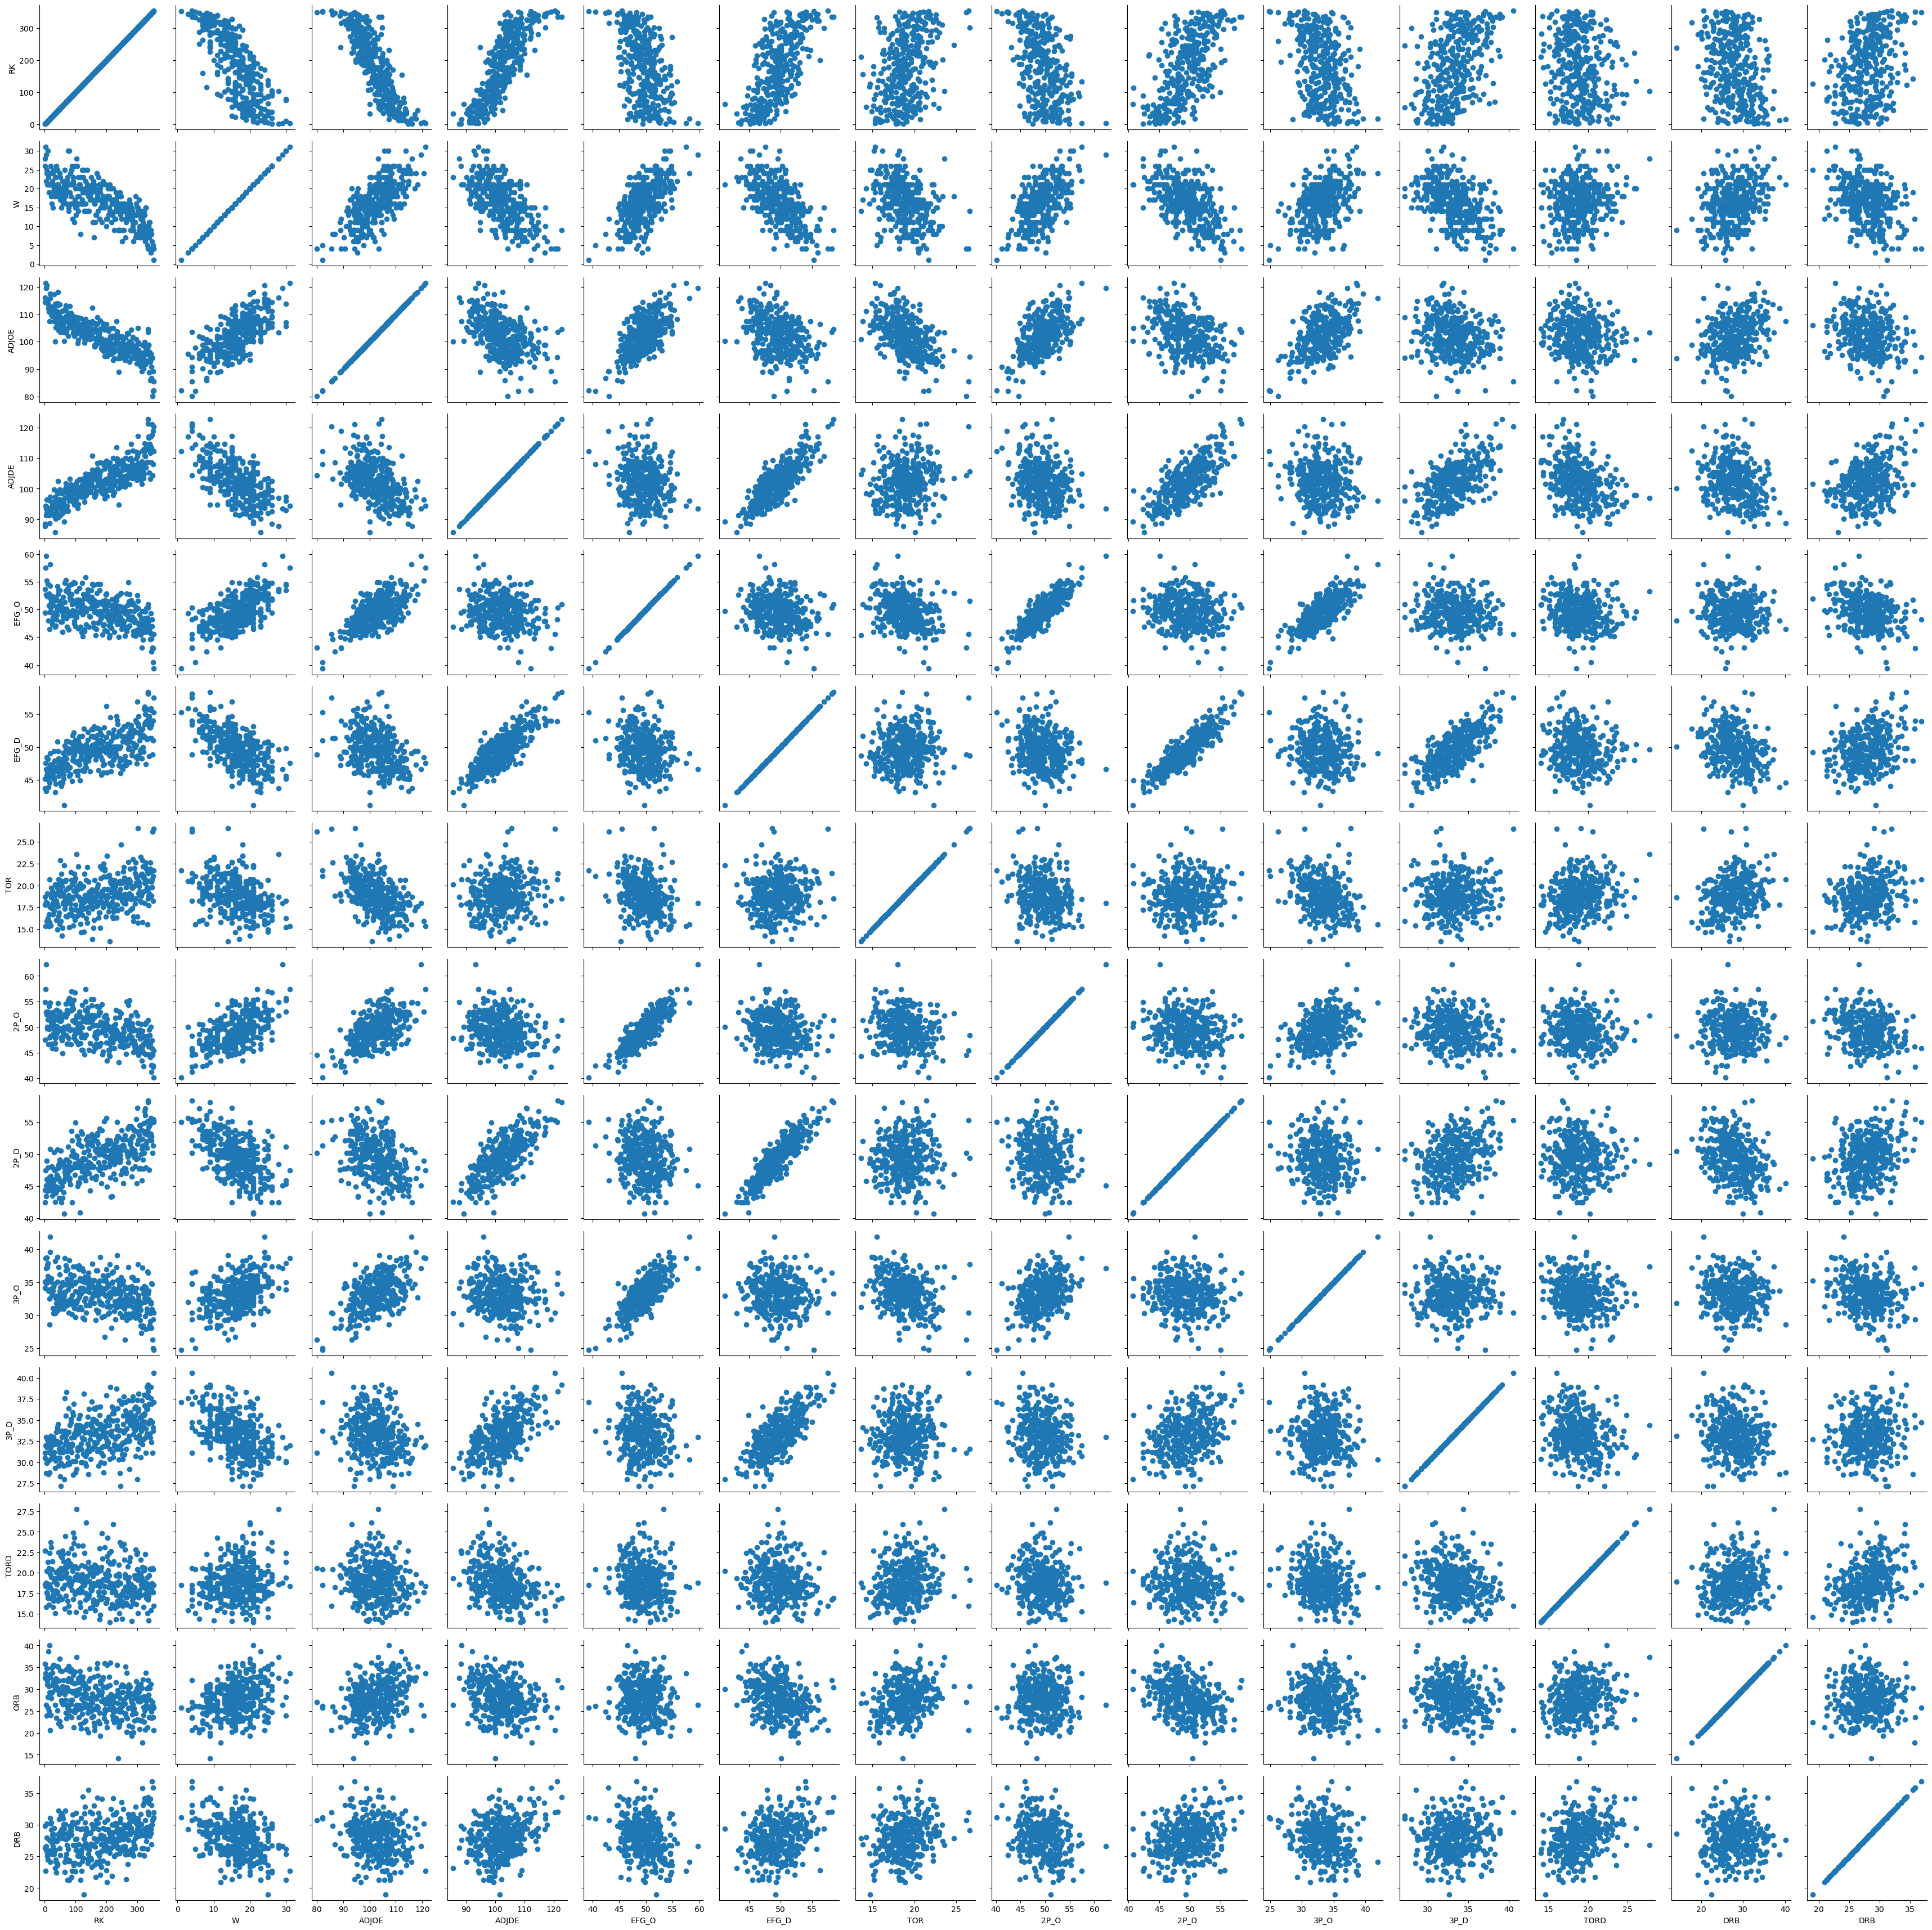

In [52]:
#displaying a pairgrid to display the relationships between RK,W,ADJOE, ADJDE, EFG_O, EFG_D, TOR,2P_O,2P_D, 3P_O,3P_D,TORD,ORB,DRB"
sns.PairGrid(twentyBasketBallData,vars=["RK","W","ADJOE", "ADJDE", "EFG_O", "EFG_D", "TOR","2P_O","2P_D", "3P_O","3P_D","TORD","ORB","DRB"]).map(plt.scatter)

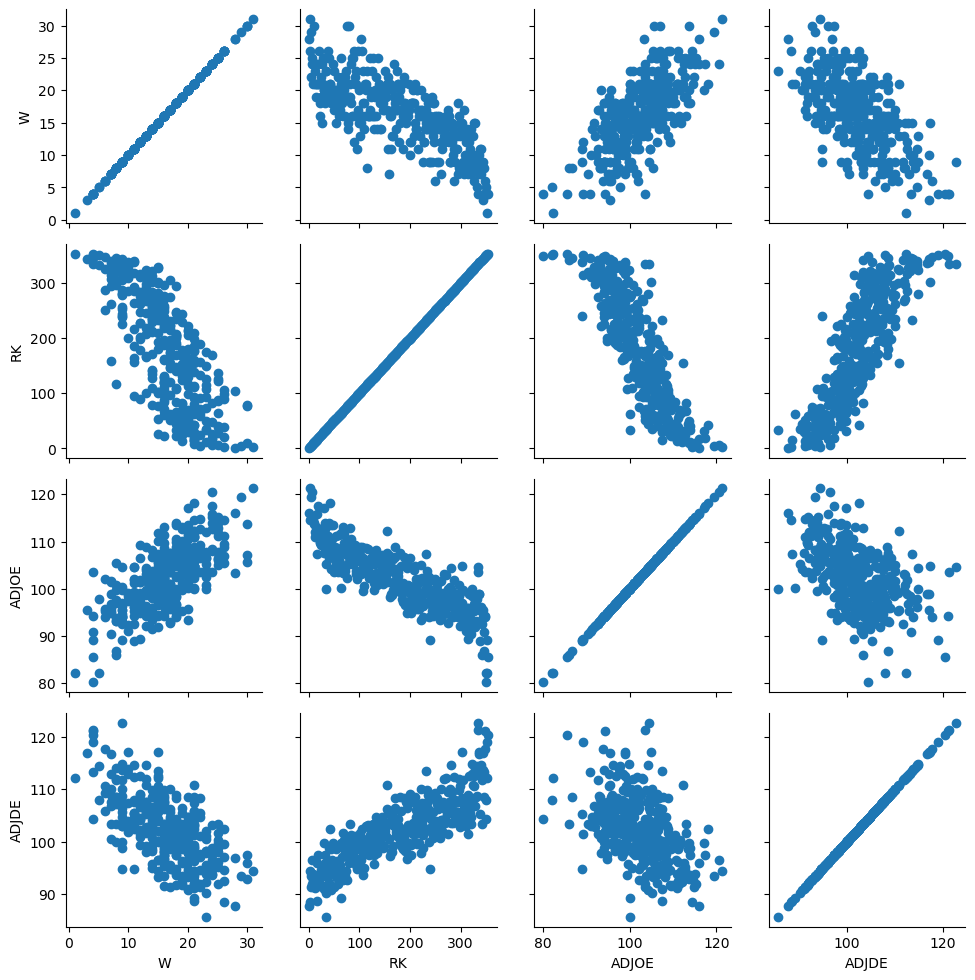

In [53]:
#displaying a pairgrid to display the relationships between RK,W,ADJOE and ADJDE.
sns.PairGrid(twentyBasketBallData, vars=["W","RK","ADJOE","ADJDE"]).map(plt.scatter)



<p><strong>By looking at the two pargrids above, I decided to build a model with ADJOE, ADJDE and W as my independent variables as they seem to have a good relationship with the RK (rankings) variable.</strong> </p>

<p> <strong>I created linear regression models with each independent variable (ADJOE, ADJDE and W) and then created a multi variable regression model with ADJOE, ADJDE and W as my indpendent variables</strong></p>


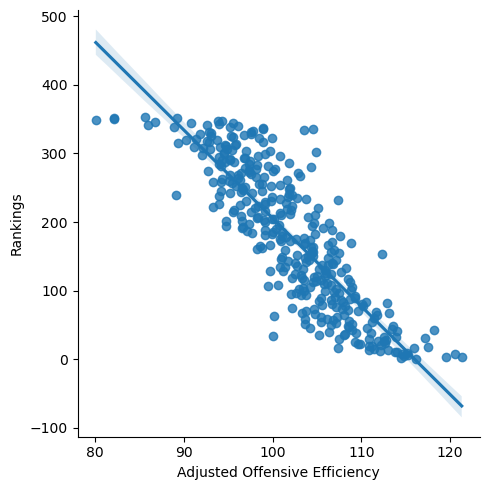

In [55]:

#displaying a line plot with ADJOE as the independent variable and the RK variable as the dependent variable
sns.lmplot(x = "ADJOE", y = "RK", data = twentyBasketBallData)
plt.ylabel("Rankings")
plt.xlabel("Adjusted Offensive Efficiency")
plt.show()

<p><strong>Looking at the line plot above, as the Adjusted Offensive Efficiency increases the ranking number decreases which is a good thing. For Example: the highest raniking team will have a ranking number of 1.</strong></p>

In [57]:

#X is the independent variable - ADJOE
X = twentyBasketBallData[["ADJOE"]]
#Y is the dependent variable - RK
y = twentyBasketBallData[["RK"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
Offensive_reg = LinearRegression()

#Fit the regressor to the training data
Offensive_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = Offensive_reg.predict(X_test)

# Compute and print RMSE between our predicted RK and actual RK
rmse = np.sqrt(mean_squared_error(y_test, y_pred))



print("score:",Offensive_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",Offensive_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",Offensive_reg.intercept_)
print("rmse: ",rmse)

score: 0.7284944180295161
coef_: [[-12.85849]]
intercept_: [1491.51253376]
rmse:  53.72156994145657


<p><strong>The r^2 of the model is pretty high with a score of 0.728, the RMSE has a value of 53.721 which is a bit high for predicting the actual ranking value. it has a coefficient of -12.86 meaning that it has a negative slope meaning that the ADJOE increases, the Ranking number decreases, which is a good thing for college basketball teams</strong></p>

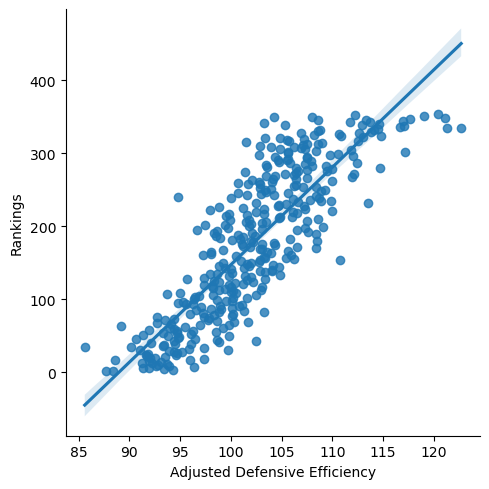

In [336]:



sns.lmplot(x = "ADJDE", y = "RK", data = twentyBasketBallData)
plt.ylabel("Rankings")
plt.xlabel("Adjusted Defensive Efficiency")
plt.show()

<p><strong>Looking at the line plot above, as the Adjusted Defensive Efficiency increases (the amount of points allowed) the ranking number increases which is a bad thing. For Example: the lowest ranking team will have a ranking number of 352. </strong></p>

In [338]:
#X is the independent variable - ADJDE
X = twentyBasketBallData[["ADJDE"]]
#Y is the dependent variable - Cost
y = twentyBasketBallData[["RK"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
Defensive_reg = LinearRegression()

#Fit the regressor to the training data
Defensive_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = Defensive_reg.predict(X_test)

# Compute and print RMSE between our predicted RK and actual RK
rmse = np.sqrt(mean_squared_error(y_test, y_pred))



print("score:",Defensive_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",Defensive_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",Defensive_reg.intercept_)
print("rmse: ",rmse)

score: 0.7071311773399784
coef_: [[13.26331641]]
intercept_: [-1177.78197016]
rmse:  61.06066318998852


<p><strong>The r^2 of the model is pretty high with a score of 0.707 but slightly lower compared to the ADJOE(Adjusted Offensive Efficiency), the RMSE has a value of 61.060 which is stil a bit high for predicting the actual ranking value. it has a coefficinet of 13.26 meaning that it has a positive slope meaning that as the ADJDE increases, the Ranking number increases, which is a bad thing for college basketball teams.</strong></p>

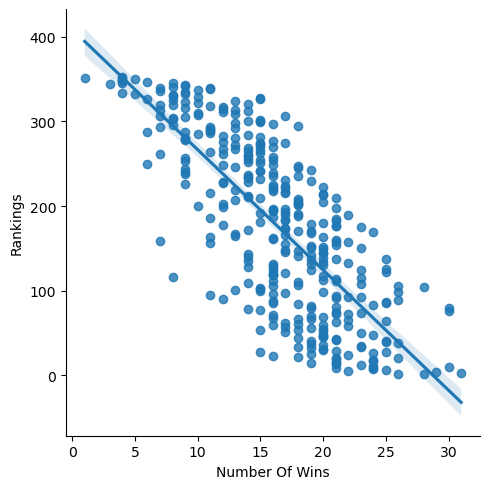

In [341]:

sns.lmplot(x = "W", y = "RK", data = twentyBasketBallData)
plt.ylabel("Rankings")
plt.xlabel("Number Of Wins")
plt.show()

<p><strong>Looking at the line plot above, as the number of wins increases the ranking number decreases which is a good thing. For Example: the highest raniking team will have a ranking number of 1.</strong></p>

In [343]:
#X is the independent variable - W
X = twentyBasketBallData[["W"]]
#Y is the dependent variable - RK
y = twentyBasketBallData[["RK"]]
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
Wins_reg = LinearRegression()

#Fit the regressor to the training data
Wins_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
Wins_pred = Wins_reg.predict(X_test)

# Compute and print RMSE between our predicted RK and actual RK
rmse = np.sqrt(mean_squared_error(y_test, Wins_pred))



print("score:",Wins_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",Wins_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",Wins_reg.intercept_)
print("rmse: ",rmse)

score: 0.5842820588397054
coef_: [[-14.33190038]]
intercept_: [410.00382251]
rmse:  65.25858757117946


<p><strong>The r^2 of the model has a score of 0.584 which is the lowest compared to the ADJOE(Adjusted Offensive Efficiency) and ADJDE(Adjusted Defensive Efficiency), the RMSE has a value of 65.259 which is high for predicting the actual ranking value. it has a coefficient of -14.332 meaning that it has a negative slope meaning that as the number of wins increase, the Ranking number decreases which is a good thing for college basketball teams</strong></p>



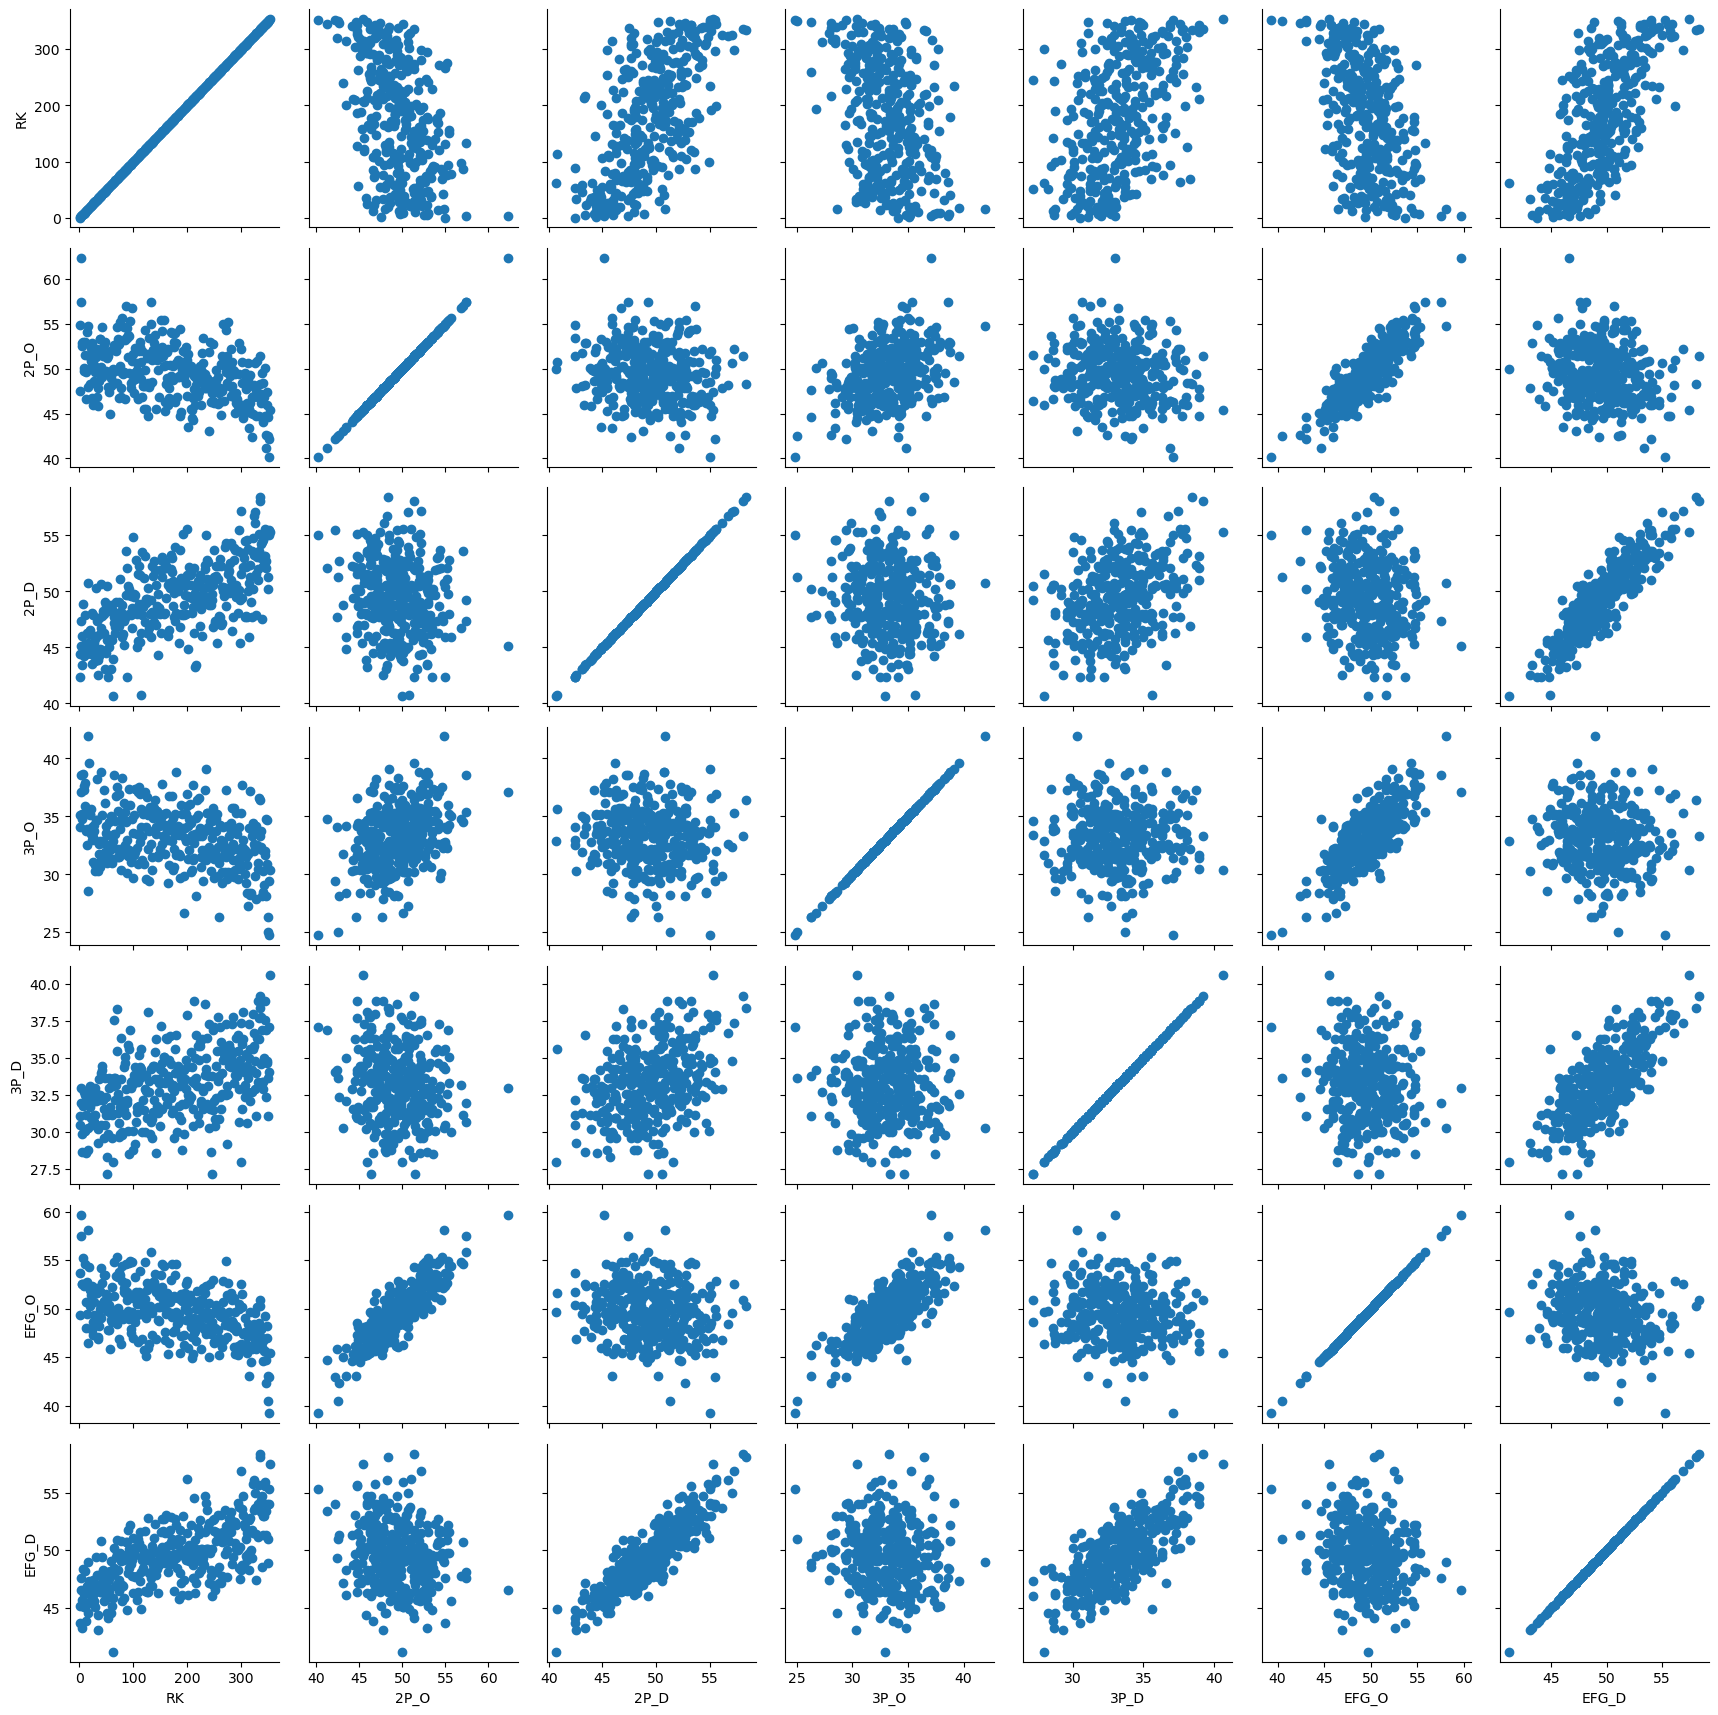

In [67]:
sns.PairGrid(twentyBasketBallData, vars=["RK","2P_O","2P_D","3P_O","3P_D","EFG_O","EFG_D"]).map(plt.scatter)

<h3> Shooting Linear Model Building </h3>
<p> I decided to also build Linear Regression models based on the basketball teams in play shooting stats and in play shot defending which consisted of:

<ul>
<li>2P_O: Two-Point Shooting Percentage</li>

<li>2P_D: Two-Point Shooting Percentage Allowed</li>

<li>3P_O: Three-Point Shooting Percentage</li>

<li>3P_D: Three-Point Shooting Percentage Allowed</li>

<li>EFG_O: Effective Field Goal Percentage Shot</li>
<li>
EFG_D: Effective Field Goal Percentage Allowed</li>
   
</ul>
</p>

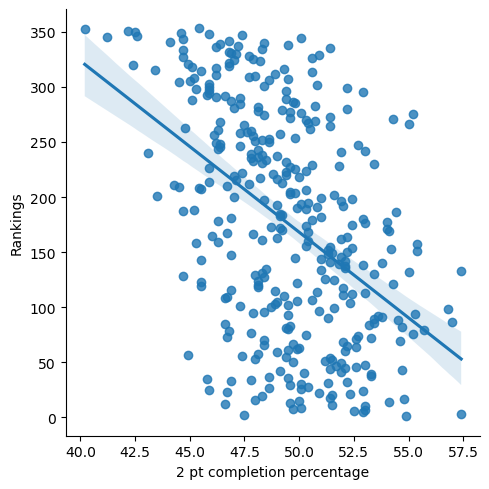

In [346]:


#removing 2pts scoring outliers
upper_limit = twentyBasketBallData['2P_O'].mean()+3*twentyBasketBallData['2P_O'].std()
lower_limit = twentyBasketBallData['2P_O'].mean()-3*twentyBasketBallData['2P_O'].std()
twentyBasketBallData= twentyBasketBallData[(twentyBasketBallData['2P_O']<upper_limit)& (twentyBasketBallData['2P_O']>lower_limit)]

#displaying a line plot between the 2P_0 and RK variables
sns.lmplot(x = "2P_O", y = "RK", data = twentyBasketBallData)
plt.ylabel("Rankings")
plt.xlabel("2 pt completion percentage")
plt.show()

<p><strong>Looking at the line plot above, The 2P_O seems to have very weak negative with the rankings variable. meaning that the as the 2 points completion rate increases, the ranking decreases which is a good thing for college basketball teams. </strong></p>

In [348]:

#X is the independent variable - 2P_O
X = twentyBasketBallData[["2P_O"]]
#Y is the dependent variable - RK

y = twentyBasketBallData[["RK"]]
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
Twopt_reg = LinearRegression()

#Fit the regressor to the training data
Twopt_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
Twopt_pred = Twopt_reg.predict(X_test)

# Compute and print RMSE between our predicted RK and actual RK
rmse = np.sqrt(mean_squared_error(y_test, Twopt_pred))



print("score:",Twopt_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",Twopt_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",Twopt_reg.intercept_)
print("rmse: ",rmse)

score: 0.21051891215120455
coef_: [[-15.77868747]]
intercept_: [955.61696242]
rmse:  84.30900067583782


<p><strong>The r^2 of the model is pretty low with a score of 0.211, the RMSE has a value of 84.309 which is high for predicting the actual ranking value. it has a coefficient of -15.779 meaning that it has a negative slope meaning that as the 2P_0 increases, the Ranking number decreases, which is a good thing for college basketball teams</strong></p>

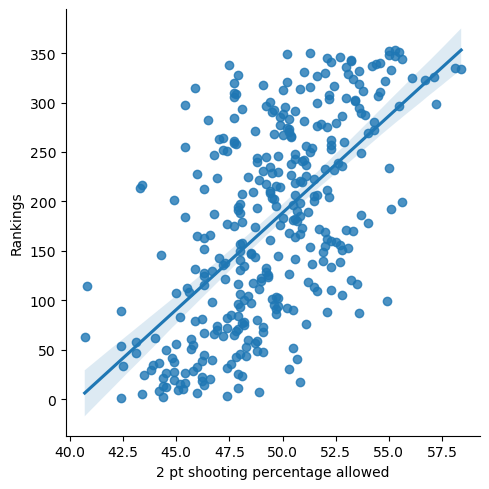

In [351]:
#X is the independent variable - 2P_D
X = twentyBasketBallData[["2P_D"]]
#Y is the dependent variable - RK
y = twentyBasketBallData[["RK"]]

sns.lmplot(x = "2P_D", y = "RK", data = twentyBasketBallData)
plt.ylabel("Rankings")
plt.xlabel("2 pt shooting percentage allowed")
plt.show()

<p><strong>Looking at the line plot above, The 2P_D seems to have a weak positive correlation with the rankings variable. meaning that the as the 2 points allowed rate increases, the ranking increases which is a bad thing for college basketball teams.</strong> </p>

In [353]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
TwoptD_reg = LinearRegression()

#Fit the regressor to the training data
TwoptD_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
TwoptD_pred =TwoptD_reg.predict(X_test)

# Compute and print RMSE between our predicted RK and actual RK
rmse = np.sqrt(mean_squared_error(y_test, TwoptD_pred))



print("score:",TwoptD_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",TwoptD_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",TwoptD_reg.intercept_)
print("rmse: ",rmse)

score: 0.3754436693275607
coef_: [[20.21265542]]
intercept_: [-825.59556683]
rmse:  83.85469085626187


<p><strong>The r^2 of the model is pretty low with a score of 0.376, it has an RMSE value of 83.854 which is high for predicting the actual ranking value. it has a coefficient of 20.21 meaning that it has a positive slope meaning that as the 2P_D increases, the Ranking number increases, which is a bad thing for college basketball teams</strong></p>

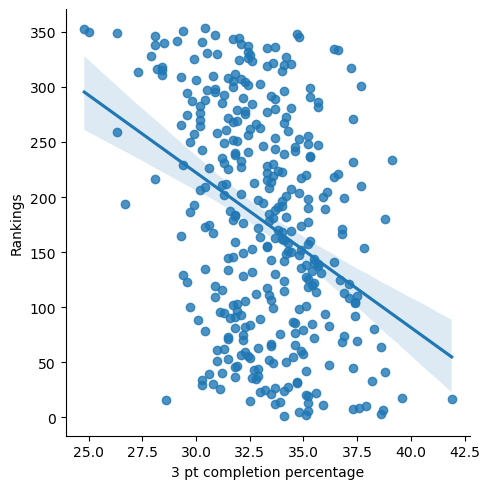

In [357]:
#removing 3P_O outliers 
upper_limit = twentyBasketBallData['3P_O'].mean()+3*twentyBasketBallData['3P_O'].std()
lower_limit = twentyBasketBallData['3P_O'].mean()-3*twentyBasketBallData['3P_O'].std()



sns.lmplot(x = "3P_O", y = "RK", data = twentyBasketBallData)
plt.ylabel("Rankings")
plt.xlabel("3 pt completion percentage")
plt.show()

<p><strong>Looking at the line plot above, The 3P_O seems to have no correlation with the rankings (RK) variable.</strong></p>

In [359]:
#X is the independent variable - 3P_O
X = twentyBasketBallData[["3P_O"]]
#Y is the dependent variable - RK
y = twentyBasketBallData[["RK"]]
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
Threept_reg = LinearRegression()

#Fit the regressor to the training data
Threept_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
Threept_pred = Threept_reg.predict(X_test)

# Compute and print RMSE between our predicted RK and actual RK
rmse = np.sqrt(mean_squared_error(y_test, Threept_pred))



print("score:",Threept_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",Threept_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",Threept_reg.intercept_)
print("rmse: ",rmse)

score: 0.12292423305195455
coef_: [[-12.34633958]]
intercept_: [583.44870405]
rmse:  90.22881367911575


<p><strong>The r^2 of the model is very low with a score of 0.123, the 3P_O has a RMSE value of 90.223 which is high for predicting the actual ranking value. it has a coefficinet of -12.35 meaning that it has a negative slope meaning that as the 3P_O increases, the Ranking number decreases, which is a good thing for college basketball teams</strong></p>

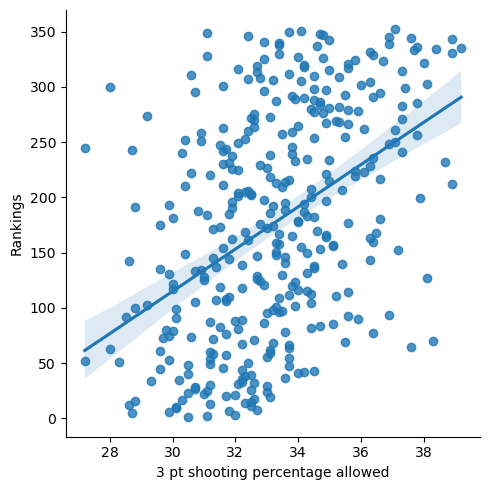

In [362]:
#removing 3P_D outliers
upper_limit = twentyBasketBallData['3P_D'].mean()+3*twentyBasketBallData['3P_D'].std()
lower_limit = twentyBasketBallData['3P_D'].mean()-3*twentyBasketBallData['3P_D'].std()
twentyBasketBallData= twentyBasketBallData[(twentyBasketBallData['3P_D']<upper_limit)& (twentyBasketBallData['3P_D']>lower_limit)]



sns.lmplot(x = "3P_D", y = "RK", data = twentyBasketBallData)
plt.ylabel("Rankings")
plt.xlabel("3 pt shooting percentage allowed")
plt.show()

<p><strong>Looking at the line plot above, The 3P_D seems to have no correlation with the rankings (RK) variable.</strong></p>

In [364]:
#X is the independent variable - 3P_D
X = twentyBasketBallData[["3P_D"]]
#Y is the dependent variable - RK
y = twentyBasketBallData[["RK"]]
#Create training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
ThreePtD_reg = LinearRegression()

#Fit the regressor to the training data
ThreePtD_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
ThreePtD_pred = ThreePtD_reg.predict(X_test)

# Compute and print RMSE between our predicted RK and actual RK
rmse = np.sqrt(mean_squared_error(y_test, ThreePtD_pred))



print("score:",ThreePtD_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",ThreePtD_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",ThreePtD_reg.intercept_)
print("rmse: ",rmse)

score: 0.19791379876470594
coef_: [[18.44362252]]
intercept_: [-436.56135588]
rmse:  78.05559873566311


<p><strong>The r^2 of the model is very low with a score of 0.198, the 3P_D has a RMSE value of 78.056 which is high for predicting the actual ranking value. it has a coefficient of 18.44 meaning that it has a positive slope meaning that as the 3P_D increases, the Ranking number increases, which is a bad thing for college basketball teams</strong></p>

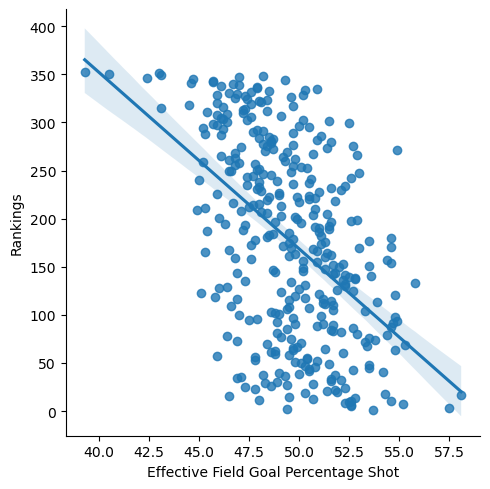

In [372]:
#removing EFG_O outliers
upper_limit = twentyBasketBallData['EFG_O'].mean()+3*twentyBasketBallData['EFG_O'].std()
lower_limit = twentyBasketBallData['EFG_O'].mean()-3*twentyBasketBallData['EFG_O'].std()



sns.lmplot(x = "EFG_O", y = "RK", data = twentyBasketBallData)
plt.ylabel("Rankings")
plt.xlabel("Effective Field Goal Percentage Shot")
plt.show()


<p><strong>Looking at the line plot above, The EFG_O seems to have no correlation with the rankings (RK) variable.</strong></p>

In [369]:
#X is the independent variable - EFG_O
X = twentyBasketBallData[["EFG_O"]]
#Y is the dependent variable - RK
y = twentyBasketBallData[["RK"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


#Create the regressor: reg
Field_Goal_Scored_reg = LinearRegression()

#Fit the regressor to the training data
Field_Goal_Scored_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = Field_Goal_Scored_reg.predict(X_test)

# Compute and print RMSE between our predicted RK and actual RK
rmse = np.sqrt(mean_squared_error(y_test, y_pred))



print("score:",Field_Goal_Scored_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",Field_Goal_Scored_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",Field_Goal_Scored_reg.intercept_)
print("rmse: ",rmse)

score: 0.24350811110047932
coef_: [[-17.90489326]]
intercept_: [1068.50049886]
rmse:  88.75715102150035


<p><strong>The r^2 of the model is very low with a score of 0.243, the EFG_O has a RMSE value of 88.757 which is high for predicting the actual ranking value. it has a coefficient of -17.90 meaning that it has a negative slope meaning that as the EFG_O increases, the Ranking number decreases, which is a good thing for college basketball teams</strong></p>

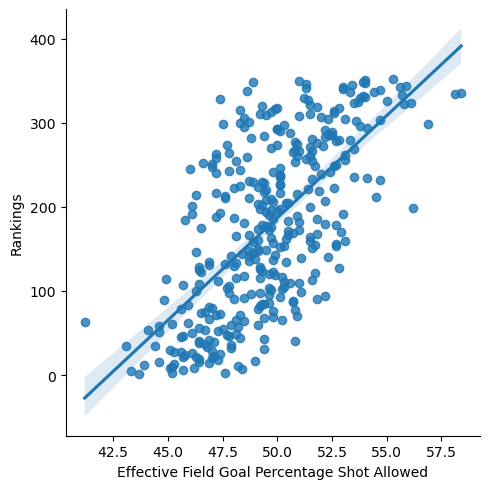

In [374]:
upper_limit = twentyBasketBallData['EFG_D'].mean()+3*twentyBasketBallData['EFG_D'].std()
lower_limit = twentyBasketBallData['EFG_D'].mean()-3*twentyBasketBallData['EFG_D'].std()



sns.lmplot(x = "EFG_D", y = "RK", data = twentyBasketBallData)
plt.ylabel("Rankings")
plt.xlabel("Effective Field Goal Percentage Shot Allowed")
plt.show()


<p><strong>Looking at the line plot above, The EFG_D seems to have a positive correlation with the rankings (RK) variable.</strong></p>

In [91]:
#X is the independent variable - EFG_D
X = twentyBasketBallData[["EFG_D"]]
#Y is the dependent variable - RK
y = twentyBasketBallData[["RK"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
Field_Goal_D_reg = LinearRegression()

#Fit the regressor to the training data
Field_Goal_D_reg.fit(X_train, y_train)

# Predict on the test data: Field_Goal_D_pred
Field_Goal_D_pred = Field_Goal_D_reg.predict(X_test)

# Compute and print RMSE between our predicted RK and actual RK
rmse = np.sqrt(mean_squared_error(y_test, Field_Goal_D_pred))



print("score:",Field_Goal_D_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",Field_Goal_D_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",Field_Goal_D_reg.intercept_)
print("rmse: ",rmse)

score: 0.43481119330476226
coef_: [[24.6027043]]
intercept_: [-1044.15536677]
rmse:  72.18751844880664


<p><strong>The r^2 of the model has a score of 0.434, the EFG_D has a RMSE value of 72.188 which is high for predicting the actual ranking value. it has a coefficient of 24.60 meaning that it has a positive slope meaning that as the EFG_D increases, the Ranking number increase, which is a bad thing for college basketball teams</strong></p>

<h2>Rebounds and Turnovers Linear Model Building</h2>

<p>I wanted to buld linear models based on Rebound and turnover stats to predict the rankings, these independent variables consisted of:

<ul>
<li> ORB: Offensive Rebound Rate </li>

<li> DRB: Offensive Rebound Rate Concedded </li>

<li> TOR: Turnover Percentage Allowed (Turnover Rate) </li>

<li> TORD: Turnover Percentage Allowed (Steal Rate) </li>
    
</ul>

</p>


</ul>

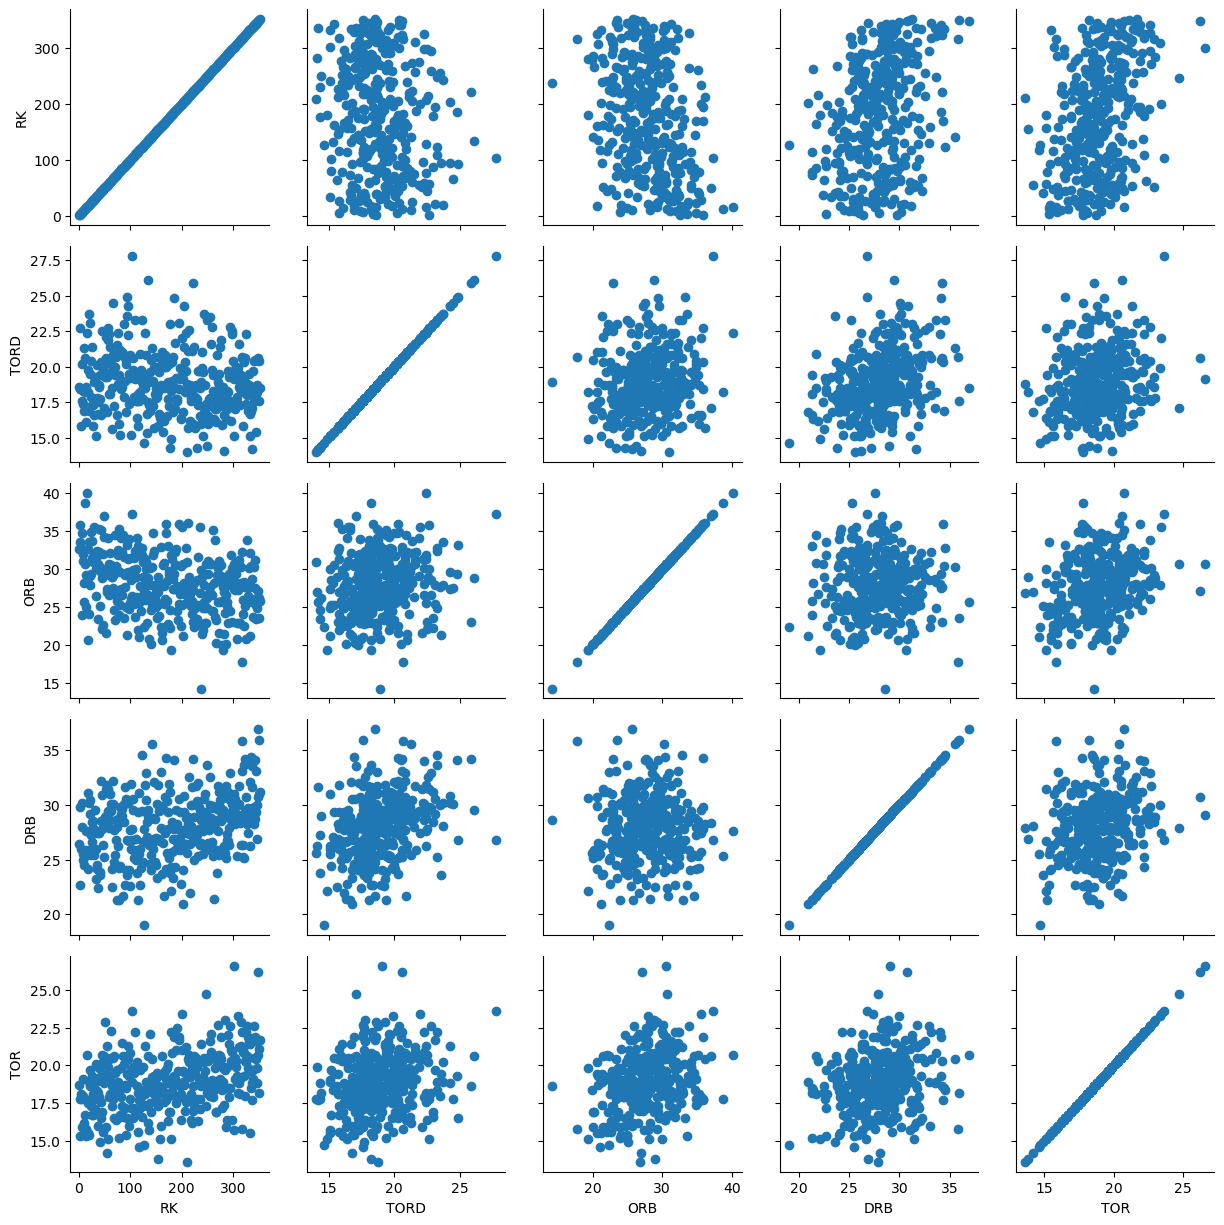

In [95]:
sns.PairGrid(twentyBasketBallData, vars=["RK","TORD","ORB","DRB", "TOR"]).map(plt.scatter)

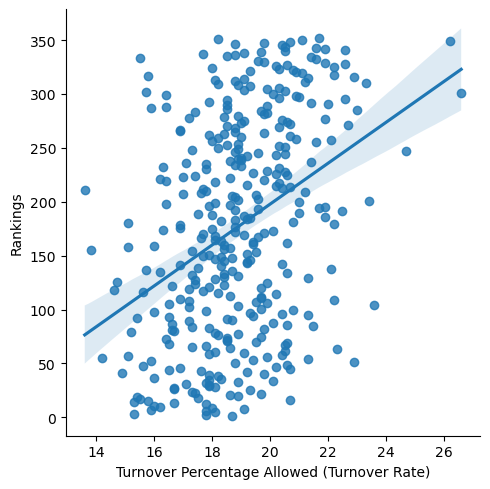

In [406]:

sns.lmplot(x = "TOR", y = "RK", data = twentyBasketBallData)
plt.ylabel("Rankings")
plt.xlabel("Turnover Percentage Allowed (Turnover Rate)")
plt.show()

<p><strong>Looking at the line plot above, The TOR seems to have no correlation with the rankings (RK) variable.</strong></p>

In [408]:
#X is the independent variable is TOR
X = twentyBasketBallData[["TOR"]]
#Y is the dependent variable - RK
y = twentyBasketBallData[["RK"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
TOR_reg = LinearRegression()

#Fit the regressor to the training data
TOR_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
TOR_pred = TOR_reg.predict(X_test)

# Compute and print RMSE between our predicted RK and actual Rk
rmse = np.sqrt(mean_squared_error(y_test, TOR_pred))



print("score:",TOR_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",TOR_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",TOR_reg.intercept_)
print("rmse: ",rmse)

score: 0.13477892451385243
coef_: [[16.99983661]]
intercept_: [-147.75548683]
rmse:  97.25833701934418


<strong>The r^2 of the model has a score of 0.134, the EFG_D has a RMSE value of 97.258 which is high for predicting the actual ranking value. it has a coefficient of 17.0 meaning that it has a positive slope meaning that as the TOR increases, the Ranking number increase, which is a bad thing for college basketball teams</strong>

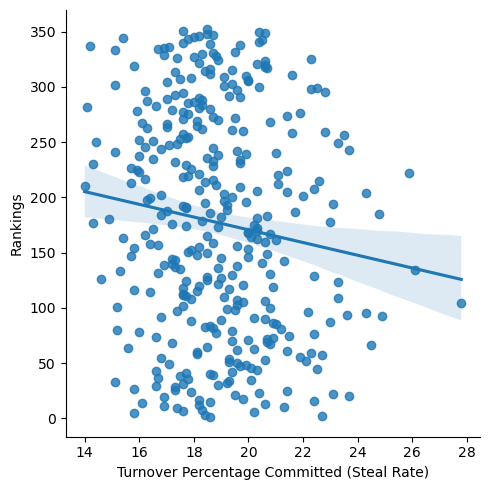

In [414]:


sns.lmplot(x = "TORD", y = "RK", data = twentyBasketBallData)
plt.ylabel("Rankings")
plt.xlabel("Turnover Percentage Committed (Steal Rate)")
plt.show()


<strong>Looking at the line plot above, The TORD seems to have no correlation with the rankings (RK) variable.</strong>

In [102]:
#X is the independent variable is TORD (steals commited)
X = twentyBasketBallData[["TORD"]]
#Y is the dependent variable - RK
y = twentyBasketBallData[["RK"]]
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
TORD_reg = LinearRegression()

#Fit the regressor to the training data
TORD_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
TORD_pred = TORD_reg.predict(X_test)

# Compute and print RMSE between our predicted MEDV and actual MEDV
rmse = np.sqrt(mean_squared_error(y_test, TORD_pred))



print("score:",TORD_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",TORD_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",TORD_reg.intercept_)
print("rmse: ",rmse)

score: 0.016378090729397776
coef_: [[-5.57757232]]
intercept_: [282.7708432]
rmse:  99.30571697075005


<strong>The r^2 of the model has a score of 0.016 which is very low, the TORD has a RMSE value of 99.306 which is high for predicting the actual ranking value. it has a coefficient of -5.58 meaning that it has a negative slope meaning that as the TORD increases, the Ranking number decrease, which is a good thing for college basketball teams</strong>

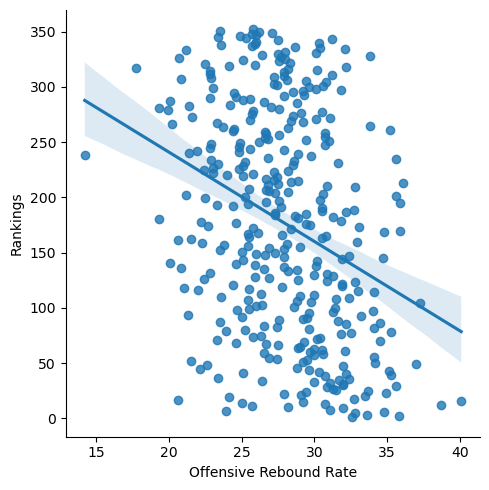

In [420]:

sns.lmplot(x = "ORB", y = "RK", data = twentyBasketBallData)
plt.ylabel("Rankings")
plt.xlabel("Offensive Rebound Rate")
plt.show()

<strong>Looking at the line plot above, The ORB seems to have no correlation with the rankings (RK) variable.</strong>

In [106]:
#Y is the dependent variable - ORB
X = twentyBasketBallData[["ORB"]]
#Y is the dependent variable - RK
y = twentyBasketBallData[["RK"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
ORB_reg = LinearRegression()

#Fit the regressor to the training data
ORB_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
ORB_pred = ORB_reg.predict(X_test)

# Compute and print RMSE between our predicted RK and actual RK
rmse = np.sqrt(mean_squared_error(y_test, ORB_pred))



print("score:",ORB_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",ORB_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",ORB_reg.intercept_)
print("rmse: ",rmse)

score: 0.10068678455557267
coef_: [[-8.09735084]]
intercept_: [403.22392664]
rmse:  92.81060954759893


<strong>The r^2 of the model has a score of 0.10 which is very low, the ORB has a RMSE value of 92.811 which is high for predicting the actual ranking value. it has a coefficient of -8.10 meaning that it has a negative slope meaning that as the Offensive Rebound Rate increases, the Ranking number decreases, which is a good thing for college basketball teams</strong>

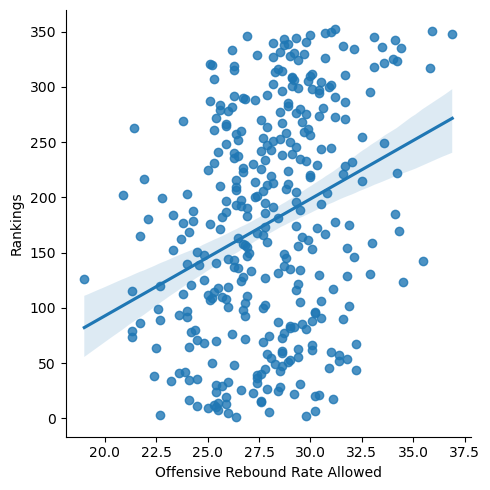

In [422]:


sns.lmplot(x = "DRB", y = "RK", data = twentyBasketBallData)
plt.ylabel("Rankings")
plt.xlabel("Offensive Rebound Rate Allowed")
plt.show()

<strong>Looking at the line plot above, The DRB seems to have no correlation with the rankings (RK) variable.</strong>

In [424]:
#X is the independent variable DRB Offensive rebound allowed
X = twentyBasketBallData[["DRB"]]
#Y is the dependent variable - RK 
y = twentyBasketBallData[["RK"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
DRB_reg = LinearRegression()

#Fit the regressor to the training data
DRB_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
DRB_pred = DRB_reg.predict(X_test)

# Compute and print RMSE between our predicted RK and actual RK
rmse = np.sqrt(mean_squared_error(y_test, DRB_pred))



print("score:",DRB_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",DRB_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",DRB_reg.intercept_)
print("rmse: ",rmse)

score: 0.09279267246694067
coef_: [[11.29556566]]
intercept_: [-136.30468276]
rmse:  96.9551314740729


<strong>The r^2 of the model has a score of 0.093 which is very low, the DRB has a RMSE value of 96.955 which is high for predicting the actual ranking value. it has a coefficient of 11.30 meaning that it has a positive slope meaning that as the Offensive Rebound Allowed Rate increases, the Ranking number increases, which is a bad thing for college basketball teams</strong>

<strong>Out of all the Linear Regression models, going by their r^2 and RMSE values, the model with the ADJOE as the independent variable was the most accurate with the highest r^2 score and lowest RMSE value while the model with the TORD as the independent variable was the least accurate with the lowest r^2 value and highest RMSE value </strong>

<h3> Multivariate Regression Model Building </h3> 
<strong> I built four Multivariate regression models to predict College basketball team rankings. The fist model indepndent variables were ADJOE (Adjusted Offensive Efficiency), ADJDE (Adjusted Defensive Efficiency) and Wins </strong>

In [430]:
#normalising the variables ADJDE, ADJOE, W and RK values to make the coefficients easier to read.
twentyBasketBallData["ADJDE"]=(twentyBasketBallData["ADJDE"]-twentyBasketBallData["ADJDE"].min())/(twentyBasketBallData["ADJDE"].max()-twentyBasketBallData["ADJDE"].min())
twentyBasketBallData["ADJOE"]=(twentyBasketBallData["ADJOE"]-twentyBasketBallData["ADJOE"].min())/(twentyBasketBallData["ADJOE"].max()-twentyBasketBallData["ADJOE"].min())
twentyBasketBallData["W"]=(twentyBasketBallData["W"]-twentyBasketBallData["W"].min())/(twentyBasketBallData["W"].max()-twentyBasketBallData["W"].min())
twentyBasketBallData["RK"]=(twentyBasketBallData["RK"]-twentyBasketBallData["RK"].min())/(twentyBasketBallData["RK"].max()-twentyBasketBallData["RK"].min())

X = twentyBasketBallData[["ADJDE", "ADJOE", "W"]]
#Y is the dependent variable - RK
y = twentyBasketBallData[["RK"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
MV_reg = LinearRegression()

#Fit the regressor to the training data
MV_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
MV_pred = MV_reg.predict(X_test)

# Compute and print RMSE between our predicted RK and actual RK
rmse = np.sqrt(mean_squared_error(y_test, MV_pred))



print("score:",MV_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",MV_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",MV_reg.intercept_)
print("rmse: ",rmse)




score: 0.9709884779196171
coef_: [[ 0.9660641  -1.03944703 -0.01029764]]
intercept_: [0.63311148]
rmse:  0.05925883508315102


<strong>The r^2 of this multivariate regression model has a very high score of 0.971 and it also has a lower RMSE value when all the independent variables are added to the model. The Adjusted Offensive Efficiency (ADJOE) weight has the biggest impact on decreasing the ranking number which is a good thing for college basketball teams. The number of wins (W) weight has the least amount of impact with the ranking value. Adding each independent variable improved the model for predicting the rankings of a college basketball team.  </strong>

In [433]:
#normalising the variables 2P_O, 2P_D, 3P_O, 3P_D, EFG_O, EFG_D values to make the coefficients easier to read.
twentyBasketBallData["2P_O"]=(twentyBasketBallData["2P_O"]-twentyBasketBallData["2P_O"].min())/(twentyBasketBallData["2P_O"].max()-twentyBasketBallData["2P_O"].min())
twentyBasketBallData["2P_D"]=(twentyBasketBallData["2P_D"]-twentyBasketBallData["2P_D"].min())/(twentyBasketBallData["2P_D"].max()-twentyBasketBallData["2P_D"].min())
twentyBasketBallData["3P_O"]=(twentyBasketBallData["3P_O"]-twentyBasketBallData["3P_O"].min())/(twentyBasketBallData["3P_O"].max()-twentyBasketBallData["3P_O"].min())
twentyBasketBallData["3P_D"]=(twentyBasketBallData["3P_D"]-twentyBasketBallData["3P_D"].min())/(twentyBasketBallData["3P_D"].max()-twentyBasketBallData["3P_D"].min())
twentyBasketBallData["EFG_O"]=(twentyBasketBallData["EFG_O"]-twentyBasketBallData["EFG_O"].min())/(twentyBasketBallData["EFG_O"].max()-twentyBasketBallData["EFG_O"].min())
twentyBasketBallData["EFG_D"]=(twentyBasketBallData["EFG_D"]-twentyBasketBallData["EFG_D"].min())/(twentyBasketBallData["EFG_D"].max()-twentyBasketBallData["EFG_D"].min())
#X is the independent variable - Distance
X = twentyBasketBallData[["2P_O","2P_D","3P_O","3P_D","EFG_O","EFG_D"]]
#Y is the dependent variable - Cost
y = twentyBasketBallData[["RK"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
MV_reg = LinearRegression()

#Fit the regressor to the training data
MV_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
MV_pred = MV_reg.predict(X_test)

# Compute and print RMSE between our predicted RK and actual RK
rmse = np.sqrt(mean_squared_error(y_test, MV_pred))



print("score:",MV_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",MV_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",MV_reg.intercept_)
print("rmse: ",rmse)

score: 0.6001450137195086
coef_: [[-0.80169552  0.71323947 -0.65964762  0.35964712  0.60464278  0.10198311]]
intercept_: [0.34380383]
rmse:  0.1958188613700173


<strong>The r^2 of this multivariate regression model has a decent score of 0.60 and it also has a lower RMSE value when all the independent variables are added to the model. The two point scoring completion (2P_O) weight has the biggest impact on decreasing the ranking number which is a good thing for college basketball teams. The effective field goal percentage allowed (EFG_D) weight has the least amount of impact with the ranking value. Adding each independent variable improved the model for predicting the rankings of a college basketball team.  </strong>

In [436]:
twentyBasketBallData["TORD"]=(twentyBasketBallData["TORD"]-twentyBasketBallData["TORD"].min())/(twentyBasketBallData["TORD"].max()-twentyBasketBallData["TORD"].min())
twentyBasketBallData["ORB"]=(twentyBasketBallData["ORB"]-twentyBasketBallData["ORB"].min())/(twentyBasketBallData["ORB"].max()-twentyBasketBallData["ORB"].min())
twentyBasketBallData["DRB"]=(twentyBasketBallData["DRB"]-twentyBasketBallData["DRB"].min())/(twentyBasketBallData["DRB"].max()-twentyBasketBallData["DRB"].min())
twentyBasketBallData["TOR"]=(twentyBasketBallData["TOR"]-twentyBasketBallData["TOR"].min())/(twentyBasketBallData["TOR"].max()-twentyBasketBallData["TOR"].min())

#X is the independent variables - TORD, ORB, DRB, TOR
X = twentyBasketBallData[["TORD","ORB","DRB", "TOR"]]
#Y is the dependent variable - RK
y = twentyBasketBallData[["RK"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
MV_reg = LinearRegression()

#Fit the regressor to the training data
MV_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
MV_pred = MV_reg.predict(X_test)

# Compute and print RMSE between our predicted MEDV and actual MEDV
rmse = np.sqrt(mean_squared_error(y_test, MV_pred))



print("score:",MV_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",MV_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",MV_reg.intercept_)
print("rmse: ",rmse)

score: 0.4221597697488624
coef_: [[-0.50914224 -0.76506084  0.54054446  0.87682346]]
intercept_: [0.46208573]
rmse:  0.24129729102363107


<strong>The r^2 of this multivariate regression model has a better score of 0.422 and it also has a lower RMSE value when all the independent variables are added to the model. The offensive rebound rate (ORB) weight has the biggest impact on decreasing the ranking number which is a good thing for college basketball teams. The offensive rebound rate  allowed (DRB) weight has the least amount of impact with the ranking value. Adding each independent variable improved the model for predicting the rankings of a college basketball team.</strong>

<p><strong>Out of the three multivariate regression models, the Adjusted Offensive Efficiency, Adjusted Defensive Efficiency and the number of Wins was the most accurate of the three models going by the r^2 and RMSE scores.</strong></p>

<p> <strong>I noticed that the adding more independent variables made the model more accurate as the r^2 increased and the RMSE values decreased. I decided to all of the independent variables used in the three multivariate regression models into one. </strong></p>

In [119]:
#X is the independent variable - Distance
X = twentyBasketBallData[["W","ADJOE","ADJDE","2P_O","2P_D","3P_O","3P_D","EFG_O","EFG_D","TORD","ORB","DRB", "TOR"]]
#Y is the dependent variable - Cost
y = twentyBasketBallData[["RK"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
MV_reg = LinearRegression()

#Fit the regressor to the training data
MV_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
MV_pred = MV_reg.predict(X_test)

# Compute and print RMSE between our predicted MEDV and actual MEDV
rmse = np.sqrt(mean_squared_error(y_test, MV_pred))



print("score:",MV_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",MV_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",MV_reg.intercept_)
print("rmse: ",rmse)

score: 0.9718850124857094
coef_: [[-0.05842985 -1.18775507  0.86873714 -0.34341275 -0.0764703  -0.2848627
  -0.02290935  0.74211187  0.11770346 -0.01546015  0.10148724  0.00610598
  -0.06415837]]
intercept_: [0.6652466]
rmse:  0.04337851757559974


<strong>The r^2 of this multivariate regression model has a similar r^2 and RMSE value to the first multivariate regression model with just the Adjusted Offensive Efficiency, Adjusted Defensive Efficiency and the number of wins as the independent variables. The Adjusted Offensive Efficiency (ADJOE) has the biggest impact on decreasing the ranking number which is a good thing for college basketball teams. The offensive rebound rate allowed (DRB) weight has the least amount of impact with the ranking value. Adding each independent variable improved the model for predicting the rankings of a college basketball team. </strong>

<h2>Building A Decision Tree To Predict The Postseason Stage College Basketball Teams Reach</h2>

<p> I decided to build a decision tree to try and predict the Postseason stage that division 1 college basketball teams reach using the same independent variables I used to build the previous models.</p>

<p> I wanted to use the cbb20.csv dataset for the decision tree as I could include the ranking variable as well but it doesnt have the postseason variable recorded because it didn't take place in the 2020 season due to the Covid-19 pandemic</p>

<p> I had to revert back to the "cbb.csv" dataset which consists of data form the 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023 Division I college basketball seasons.  </p>

In [123]:

# Calculating entropy for the entire dataset
probabilities = basketBallData.POSTSEASON.value_counts(normalize=True)
entropy_full_set = -np.sum(probabilities*np.log2(probabilities))
print(f"Entropy of the full dataset: {entropy_full_set}")

def gini_impurity(probabilities):
    return 1 - np.sum(probabilities**2)

gini_full_set = gini_impurity(probabilities)
print(f"Gini Impurity of the full dataset: {gini_full_set}")

Entropy of the full dataset: 1.1276883594612943
Gini Impurity of the full dataset: 0.33764413715667085


<p> <strong> The entropy of the college basketball data set is 1.1276883594612943 and the gini impurity of the dataset is 0.33764413715667085 which means there is a moderate level of impurity in the dataset.</strong> </p>


Test Accuracy: 0.81


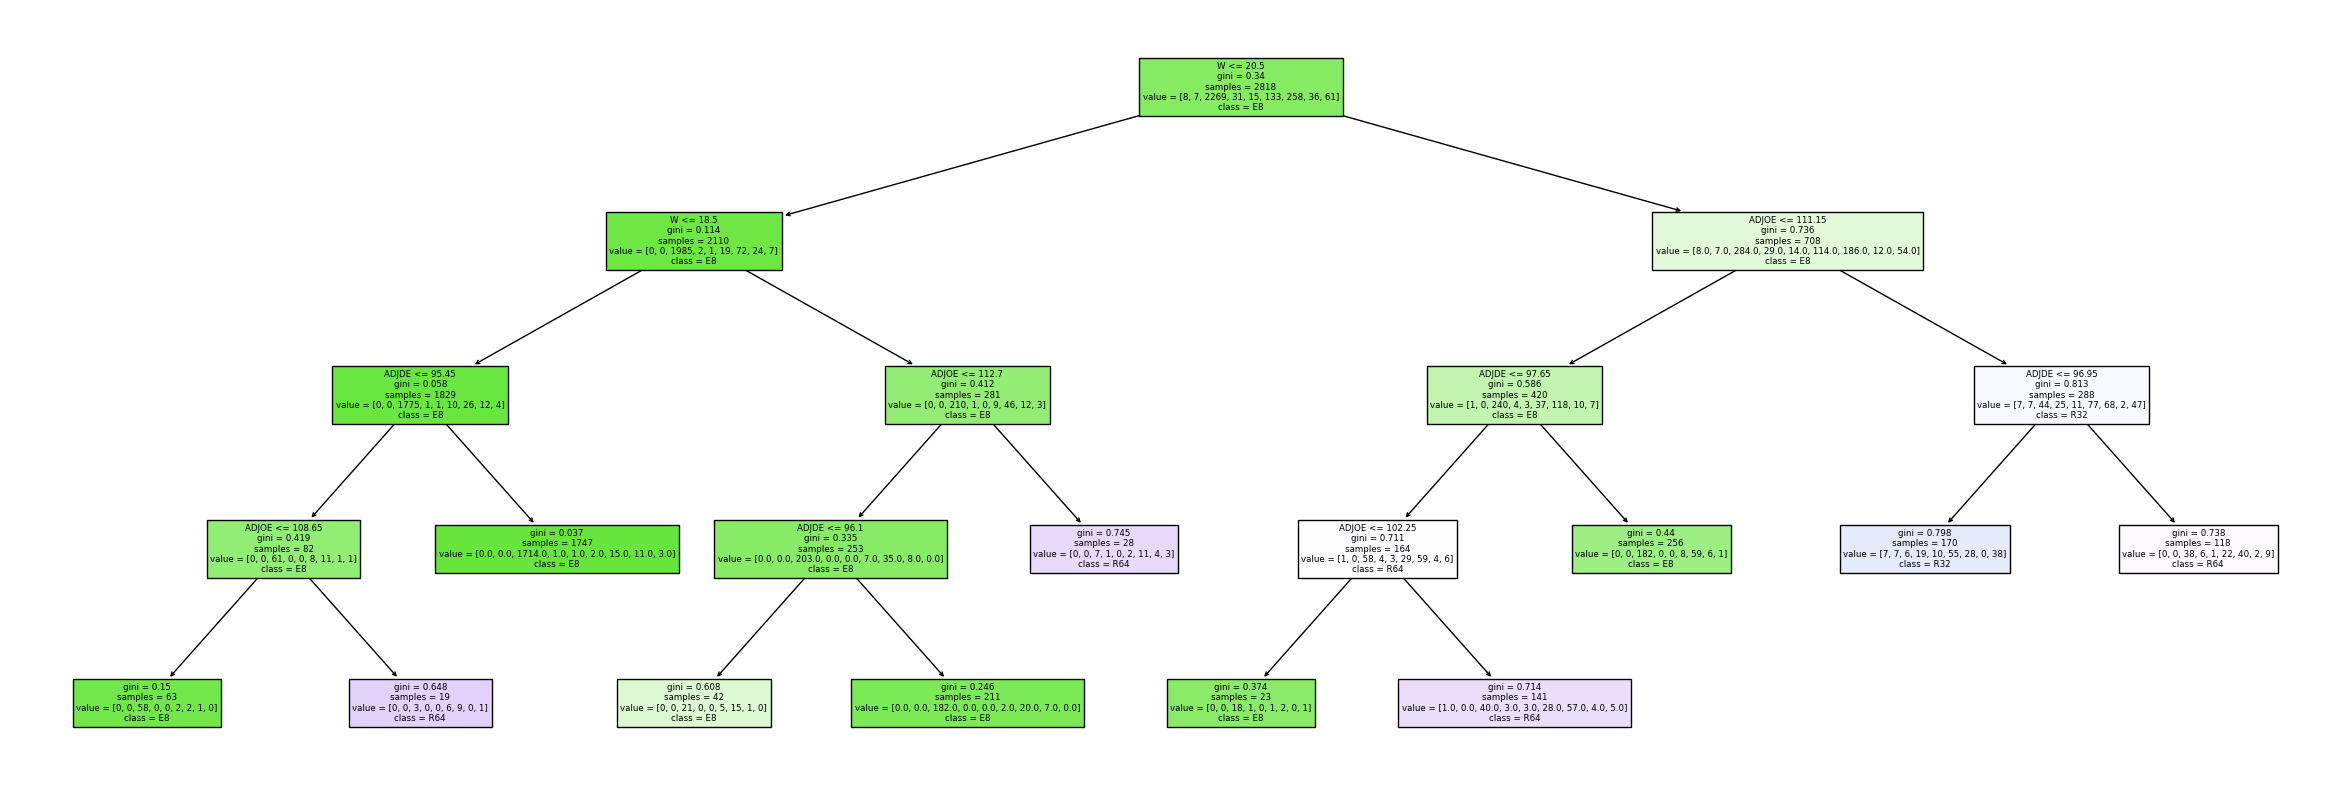

              precision    recall  f1-score   support

         2ND       0.00      0.00      0.00         2
   Champions       0.00      0.00      0.00         3
          DQ       0.93      0.93      0.93       574
          E8       0.00      0.00      0.00         9
          F4       0.00      0.00      0.00         5
         R32       0.27      0.52      0.35        27
         R64       0.26      0.32      0.29        62
         R68       0.00      0.00      0.00         4
         S16       0.00      0.00      0.00        19

    accuracy                           0.81       705
   macro avg       0.16      0.20      0.17       705
weighted avg       0.79      0.81      0.80       705



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [125]:




#creating a data frame with all the indepdendent variables
Decision_Tree_BasketBall_Dataset=basketBallData[["W","ADJOE","ADJDE","2P_O","2P_D","3P_O","3P_D","EFG_O","EFG_D","TORD","ORB","DRB", "TOR"]]
#training the model
X_train, X_test, y_train, y_test = train_test_split(Decision_Tree_BasketBall_Dataset, basketBallData.POSTSEASON, test_size=0.2, random_state=42)
#creating the decision tree
Postseason_decision_tree = DecisionTreeClassifier( random_state=42,ccp_alpha=0.01)
Postseason_decision_tree.fit(X_train, y_train)


#pruning the decision tree.
param_grid = {'ccp_alpha': np.linspace(0, 0.02, 50)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)



optimal_tree = grid_search.best_estimator_
y_test_pred_optimal = optimal_tree.predict(X_test)
optimal_test_accuracy = accuracy_score(y_test, y_test_pred_optimal)

print(f"Test Accuracy: {optimal_test_accuracy:.2f}")

#displaying the decision tree.
plt.figure(figsize=(30,10))
tree_plot = plot_tree(optimal_tree, feature_names=Decision_Tree_BasketBall_Dataset.columns, class_names=basketBallData.POSTSEASON.unique(), filled=True)
plt.show()
#print accuracy report
print(classification_report(y_test, y_test_pred_optimal))



<p><strong> The decision tree has an accuracy of 81%, it seems that the decision tree is able to predict the DQ more sucessfully compared to the other classes as it has a very high precision, recall and f1-score of 0.93. It seems that the decision is very biased in selecting the "DQ" class.</strong></p>

<h2>College Basketball Dataset Conclusion</h2>

<p> I really found it interesting exploring the data in the college basketball dataset. I am intersted in sports and I knew that this dataset would have lots of interesting data that I could explore more into and be able to build models and decision trees on.</p>

<p> I looked into the top 100 teams with the best ADJOE (Adjusted Offensive Efficicency) and the top 100 teams with the best ADJDE (Adjusted Defensive Efficiency) see how they performed in terms of the number of wins in a season and the number of furthest apearances in each postseason stage. The teams with the higher ADJOE rating tend to get more wins in a season and won more championships compared to teams with a better ADJDE. </p>

<p> I also looked into the top 100 teams with highest 2pt shooting percentage and the top 100 teams with the highest 3pt scoring percentage and compared them based on the number of wins in a season and the number of appearances in each postseason stage. Teams with a higher 2pt completion percentage achieved more wins and had more appearances in most of the postseason stages. </p>

<p>
I build Linear Regression models to predict the ranking of a college basketball team. I had to import the cbb20.csv data set as the ranking variable was not recorded on the cbb.csv dataset I was working on. I discovered that the most accurate linear regression model I built was when the ADJOE was used for the independent variable and the least accurate model was when the TORD (Turnover Percentage Committed (Steal Rate)) was the independent variable.

</p>

<p> I also built four multivariate regression models to predict the rankings of a college basketball team. The first one was based on the ADJOE, ADJDE and the number of wins. The second multivariate regression model was based on shooting stats and the third multivariate regression model was based on rebounds and turn overs. Out of them three regression models, the model that consisted of the independent variables ADJOE, ADJDE and the number of wins (W) was the most accurate in predicting the rankings of a college basketball team with the rebounds and turnovers model being the least accurate. I noticed that the models were becoming more accurate when I added more independent variables into them, so I decided to create another model which included all the independent variables used in the three previous multivariate regression models. The accuracy of the fourth regression model was similar to the first multivariate regression model which consisted of the ADJOE, ADJDE and W independant variables. </p>

<p>Lastly, I created a decision tree to predict what stage a college basketball team would reach in the postseason. I had to revert back to the cbb.csv dataset because the cbb20.csv dataset did not have any of the Postseason data recorded as it didn't take place in the 2020 season due to the covid-19 pandemic. I used the same variables that I built my regression models with. The decision tree had an accuracy of 81 % and was heavily bias in selecting the DQ class.</p>

<p> I was dissapointed the cbb.csv didn't have the rankings recorded as I would have liked to build a decision tree that included the rankings to predict the postseason stage a division 1 college basketball team reaches. </p>

<p> I found working on this dataset interesting and I feel that I have learnt more on data preparation, data exploration, model building and decision tree building. </p>

<h1>Students Exams Performance</h1>

<h2>Introduction</h2>

<p>  I selected this dataset as I thought it would be great one to use for data exploration and model building. It contained interesting columns such as "test_preparation_course" and "lunch" which could be interesting how much impact they have with students exams performance. </p>

<p> This dataset was created by Aman Chauhan</p>

<p><strong>COLUMN INFORMATION: (Assumptions: couldnt find column explanation on Kaggle)</strong>

<ul>
    <li>gender: student's gender</li>
    <li> race_ethnicity: Students race ethnicity </li>
    <li>parental_level_of_education: Student's parents level of education</li>
    <li>lunch: type of lunch student received.</li>
    <li>test_preparation_course: did a Student complete a test course</li>
    <li>math_score: math score achieved by student</li>
    <li>reading_score: reading score achieved by student</li>
    <li>writing_score: writing score achieved by student</li>
    <li>total_score: total score achieved by student</li>
    <li>average_score: average score avhieved by student.</li>
    
</ul>

</p>


<p><strong>
    * I have been working on this cleaned students performance dataset which I got on kaggle. I can't find this dataset on kaggle anymore and i think it has been removed. i found the dataset I'm assuming is from the same author as it contains the same columns (excluding total_score and average_score) but the values in the test_preparation_course, lunch and gender are different. on the dataset i have been working on these values were O and 1, The dataset that is currently on Kaggle, the values in the test_preparation_course are "completed" and "none" and the values for lunch are "free/reduced" and "standard" and the values of gender are "male" and "female".

<ul>
    <li> Assuming by the percentage amount of values in each column on the Students Performance in Exams data card on kaggle </li>
    <li> I counted the rows of  each value in the specified columns and I'm assuming that these are what the values mean. </li>
    <li><strong> Lunch:  </strong> 1 = standard, 0=free/reduced </li>
    <li><strong> test_preparation_course:  </strong> 0=none, 1 = completed</li>
    <li><strong>gender: 1= female, 0 = male</strong></li>
    
</ul>
</strong></p>

<p><strong>Link to Students Performance in Exams dataset: https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams</strong>
<p> <strong>Apologies For The Inconvenince <strong>
</p>

<h2>Data Preprocessing </h2>

In [132]:
#reading in Cleaned_Students_Performance.csv dataset
StudentsData= pd.read_csv("ProjectData/Cleaned_Students_Performance.csv")


In [133]:
#displaying data types in the dataset
StudentsData.dtypes

gender                           int64
race_ethnicity                  object
parental_level_of_education     object
lunch                            int64
test_preparation_course          int64
math_score                       int64
reading_score                    int64
writing_score                    int64
total_score                      int64
average_score                  float64
dtype: object

<p><strong>I was happy enough with the data types for each variable and I didn't make any changes.</strong></p>

In [135]:
#checking for null values.
StudentsData.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
dtype: int64

<p><strong> I also checked for any null values in which there was none.</strong></p>

In [137]:
#display a summary of the dataset
StudentsData.describe(include="all")

gender race_ethnicity parental_level_of_education        lunch  \
count   1000.000000           1000                        1000  1000.000000   
unique          NaN              5                           6          NaN   
top             NaN        group C                some college          NaN   
freq            NaN            319                         226          NaN   
mean       0.482000            NaN                         NaN     0.645000   
std        0.499926            NaN                         NaN     0.478753   
min        0.000000            NaN                         NaN     0.000000   
25%        0.000000            NaN                         NaN     0.000000   
50%        0.000000            NaN                         NaN     1.000000   
75%        1.000000            NaN                         NaN     1.000000   
max        1.000000            NaN                         NaN     1.000000   

        test_preparation_course  math_score  reading_score  writing_score  \
count               1000.000000  1000.00000    1000.000000    1000.000000   
unique                      NaN         NaN            NaN            NaN   
top                         NaN         NaN            NaN            NaN   
freq                        NaN         NaN            NaN            NaN   
mean                   0.358000    66.08900      69.169000      68.054000   
std                    0.479652    15.16308      14.600192      15.195657   
min                    0.000000     0.00000      17.000000      10.000000   
25%                    0.000000    57.00000      59.000000      57.750000   
50%                    0.000000    66.00000      70.000000      69.000000   
75%                    1.000000    77.00000      79.000000      79.000000   
max                    1.000000   100.00000     100.000000     100.000000   

        total_score  average_score  
count   1000.000000    1000.000000  
unique          NaN            NaN  
top             NaN            NaN  
freq            NaN            NaN  
mean     203.312000      67.770667  
std       42.771978      14.257326  
min       27.000000       9.000000  
25%      175.000000      58.333333  
50%      205.000000      68.333333  
75%      233.000000      77.666667  
max      300.000000     100.000000

<p><strong>I displayed a summary of the dataset to get a quick understanding of the data.</strong></p>

In [139]:
#displaying the first five rows of the dataset.
StudentsData.head()

gender race_ethnicity parental_level_of_education  lunch  \
0       0        group B           bachelor's degree      1   
1       0        group C                some college      1   
2       0        group B             master's degree      1   
3       1        group A          associate's degree      0   
4       1        group C                some college      1   

   test_preparation_course  math_score  reading_score  writing_score  \
0                        0          72             72             74   
1                        1          69             90             88   
2                        0          90             95             93   
3                        0          47             57             44   
4                        0          76             78             75   

   total_score  average_score  
0          218      72.666667  
1          247      82.333333  
2          278      92.666667  
3          148      49.333333  
4          229      76.333333

<p><strong> I checked the first five rows of the dataset to see what values are recorded in each column. </strong></p>

In [141]:
#checking for any of the duplicated values
StudentsData.duplicated().sum()

0

<p><strong>I also checked for any duplicated values in which there was none. </strong></p>

<h2> Data Exploration</h2>

<p><strong> I started off by looking at the relationships between math, reading and writing scores by displayinf the pair grid. </strong></p>

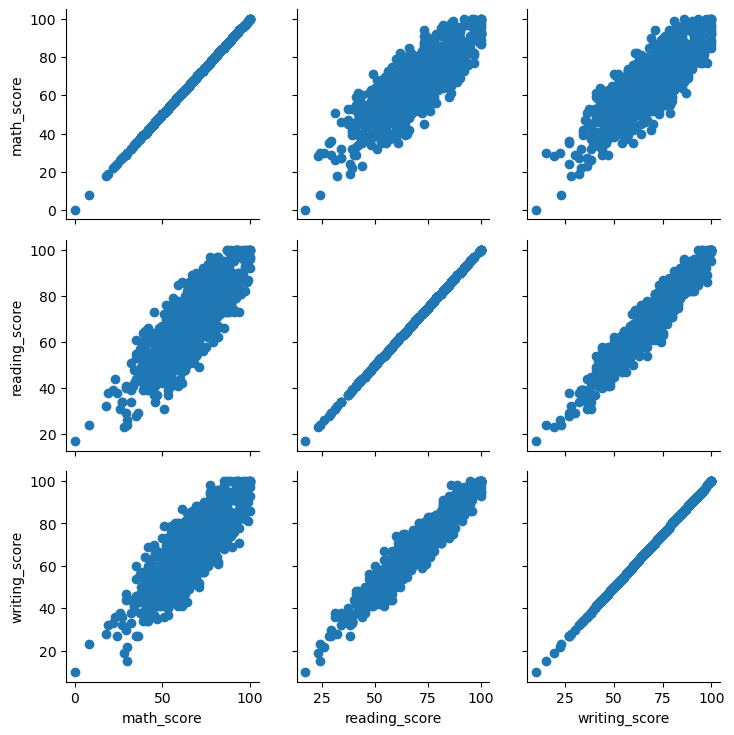

In [145]:
#displaying a pairgrid to see the relationship between math, reading and writing scores.
sns.PairGrid(StudentsData, vars=["math_score","reading_score","writing_score"]).map(plt.scatter)

<p><strong> By looking at the pair grid above, there is a strong positive correlation amongst all the scores, the strongest correlation being the reading and writing score. </strong></p>

<h3>Does The Level Of Education Of The Children Parents Have A Positive Impact On Their Childrens Scores?</h3>

<p><strong> I was curious to see if the the level of education have an influence on the students maths, reading, writing and average scores.  </strong></p>

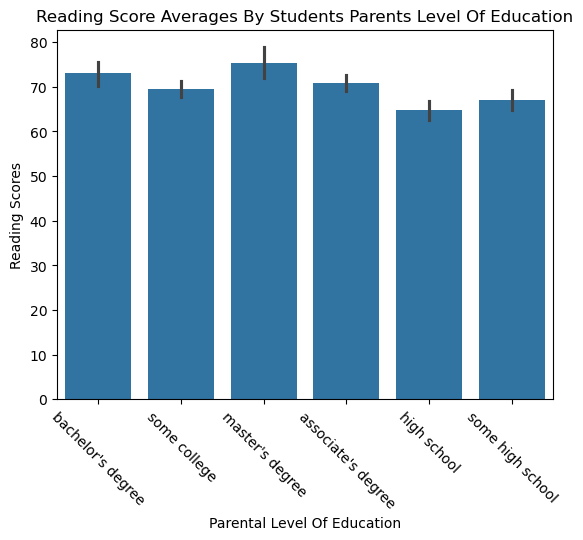

In [569]:
#creating bar chart to display the average reading score the students achieved by the parental level of education
sns.barplot(x=StudentsData['parental_level_of_education'], y=StudentsData['reading_score'])
plt.xticks(rotation=-45)
plt.ylabel("Reading Scores")
plt.xlabel("Parental Level Of Education")
plt.title("Reading Score Averages By Students Parents Level Of Education")
plt.show()


<p><strong>According to the barchart above, Students whose parents have achieved Master's degrees have the highest reading score average. Students whose parents went to high school have the lowest average reading scores</strong></p>

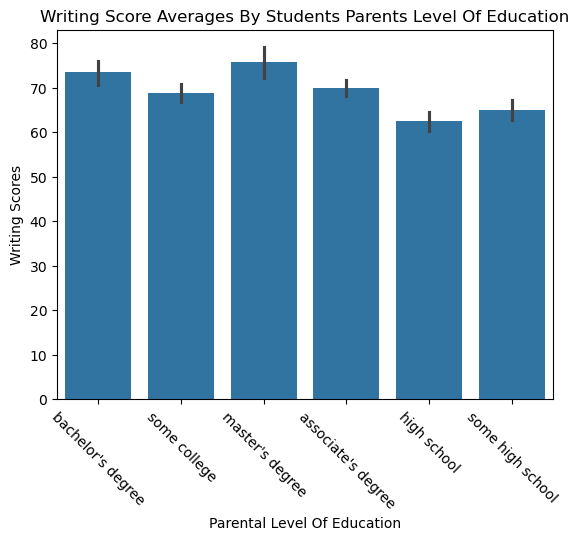

In [567]:
#creating bar chart to display the average writing score the students achieved by the parental level of education
sns.barplot(x=StudentsData['parental_level_of_education'], y=StudentsData['writing_score'])
plt.xticks(rotation=-45)
plt.ylabel("Writing Scores")
plt.title("Writing Score Averages By Students Parents Level Of Education")
plt.xlabel("Parental Level Of Education")
plt.show()

<p><strong>According to the barchart above, Students whose parents have achieved Master's degrees have the highest writing score average. Students whose parents went to high school have the lowest average writing scores</strong></p>

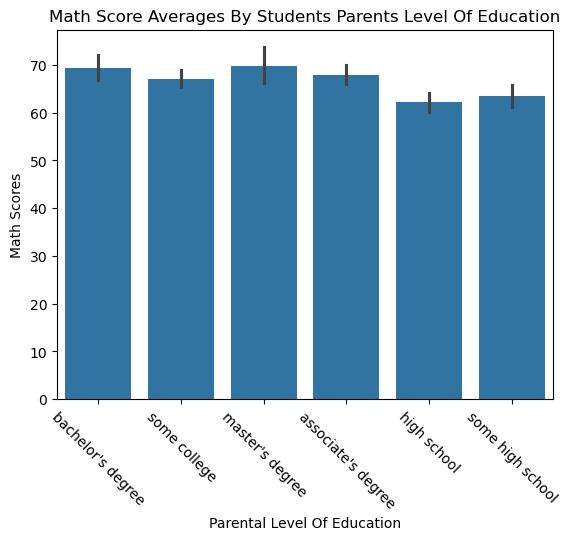

In [565]:
#creating bar chart to display the average math score the students achieved by the parental level of education
sns.barplot(x=StudentsData['parental_level_of_education'], y=StudentsData['math_score'])
plt.xticks(rotation=-45)
plt.ylabel("Math Scores")
plt.title("Math Score Averages By Students Parents Level Of Education")
plt.xlabel("Parental Level Of Education")
plt.show()

<p><strong>According to the barchart above, Students whose parents have achieved Master's degrees have the highest maths score average. Students whose parents went to high school have the lowest average maths scores</strong></p>


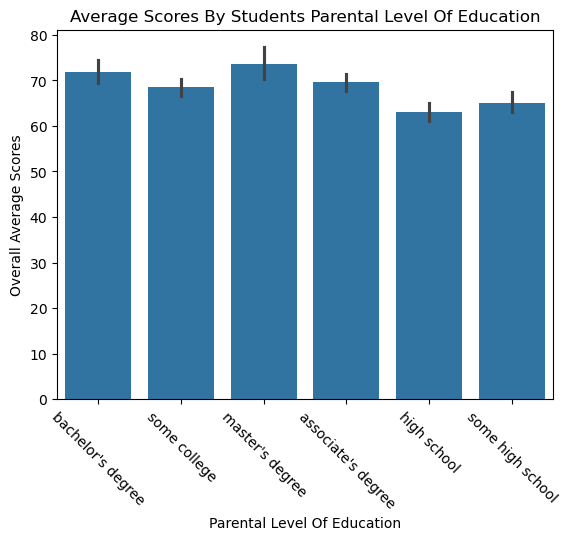

In [563]:

#creating bar chart to display the overall average score the students achieved by the parental level of education
sns.barplot(x=StudentsData['parental_level_of_education'], y=StudentsData['average_score'])
plt.xticks(rotation=-45)
plt.ylabel("Overall Average Scores")
plt.title("Average Scores By Students Parental Level Of Education")
plt.xlabel("Parental Level Of Education")
plt.show()


<p><strong>According to the barchart above, Students whose parents have achieved Master's degrees have the highest overall average score. Students whose parents went to high school have the lowest average maths scores</strong></p>

<p><strong>According to the bar charts I created above, It seems that the higher level of education that the parents achieve seems to have a positive impact on their childrens exam scores with the student's whose parents achieved Master's degrees achieving the highest scores. </strong></p>

<h2>Which Gender Achieves Better Results In Maths,Reading and Writing?   </h2>

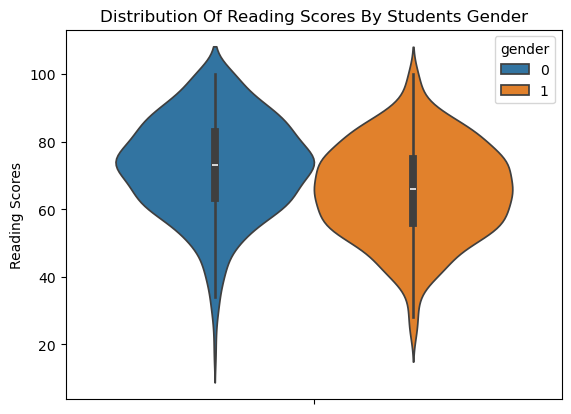

In [463]:
##creating a violinplot to display the distribution of reading scores by Gender.
sns.violinplot(y =StudentsData["reading_score"], hue=StudentsData["gender"])
plt.ylabel("Reading Scores")
plt.title("Distribution Of Reading Scores By Students Gender")
plt.show()

<ul>
    <li>0 = Male</li>
    <li>1 = Female</li>
</ul>
<p><strong>There is a high frequency of male students that are achieving high reading scores as the male student violin graph is significantly wider between the 80 - 100 range compared to the female students violin graph </strong></p>


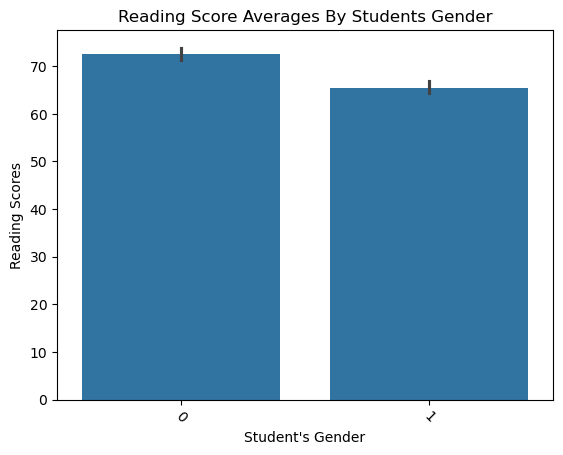

In [523]:
#creating a barchart to display the average reading score by the students gender
sns.barplot(x=StudentsData['gender'], y=StudentsData['reading_score'])
plt.xticks(rotation=-45)
plt.ylabel("Reading Scores")
plt.title("Reading Score Averages By Students Gender")
plt.xlabel("Student's Gender")
plt.show()

<ul>
    <li>0 = Male</li>
    <li>1 = Female</li>
</ul>
<p><strong> According to the bar chart I created, male students are achieving a higher reading score average of around 70 compared  to the female students who achived an average reading score of around 65</strong></p>

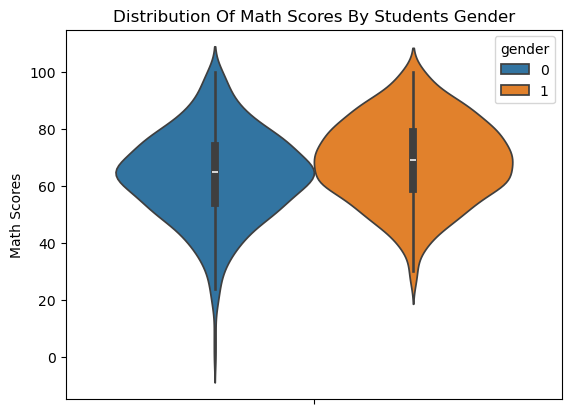

In [521]:
##creating a violinplot to display the distribution of math scores by Gender.
sns.violinplot(y =StudentsData["math_score"], hue=StudentsData["gender"])
plt.ylabel("Math Scores")
plt.title("Distribution Of Math Scores By Students Gender")

plt.show()

<ul>
    <li>0 = Male</li>
    <li>1 = Female</li>
</ul>
 <p><strong>There is a high frequency of female students that are achieving better math scores as the female students violin graph is significantly wider between the 60 - 80 range compared to the male students violin graph. </strong></p>

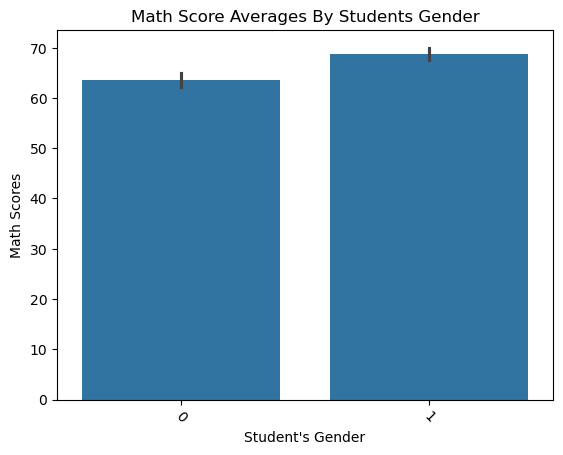

In [474]:
#creating a barchart to display the average math score by the students gender
sns.barplot(x=StudentsData['gender'], y=StudentsData['math_score'])
plt.xticks(rotation=-45)
plt.ylabel("Math Scores")
plt.title("Math Score Averages By Students Gender")
plt.xlabel("Student's Gender")

plt.show()

<ul>
    <li>0 = Male</li>
    <li>1 = Female</li>
</ul>
<p><strong> According to the bar chart I created, Female students are achieving a higher math score average of around 68 compared  to the male students who achived an average math score of around 63</strong></p>

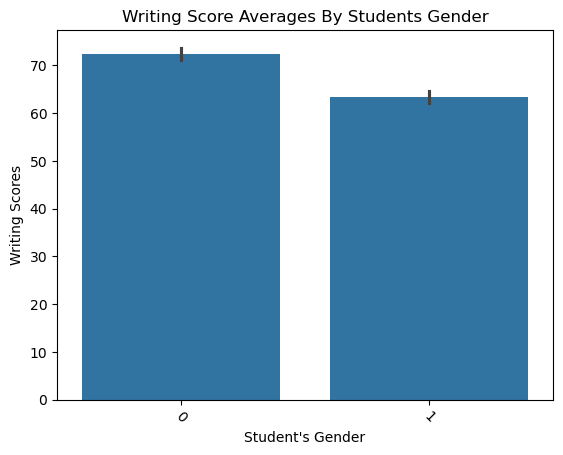

In [519]:
#creating a barchart to display the average writing score by the students gender
sns.barplot(x=StudentsData['gender'], y=StudentsData['writing_score'])
plt.xticks(rotation=-45)
plt.ylabel("Writing Scores")
plt.title("Writing Score Averages By Students Gender")
plt.xlabel("Student's Gender")
plt.show()

<ul>
    <li>0 = Male</li>
    <li>1 = Female</li>
</ul>
<p><strong> According to the bar chart I created, male students are achieving a higher writing score average of around 72 compared  to the female students who achieved an average writing score of around 63</strong></p>

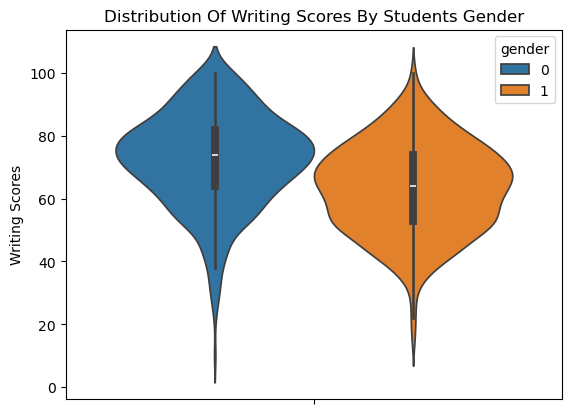

In [515]:
##creating a violinplot to display the distribution of writing scores by Gender.
sns.violinplot(y =StudentsData["writing_score"], hue=StudentsData["gender"])
plt.ylabel("Writing Scores")
plt.title("Distribution Of Writing Scores By Students Gender")

plt.show()

<ul>
    <li>0 = Male</li>
    <li>1 = Female</li>
</ul>
<p><strong> There is a high frequency of male students that are achieving better writing scores as the male students violin graph is significantly wider between the 75 - 80 range compared to the female students violin graph which is significantky wider between the 60-70 range. </strong></p>

<p><strong> Male students seem to achieve better scores in writing and reading but female students achieve better scores in maths. </strong></p>

<h2> Does Students Who Have The Standard Lunch Tend To Achieve Better Results? </h2>

<p><strong> I wanted to look into that the effect the type of lunch that the students have on their exam performance. Students can receive the standard lunch or the free/reduced lunch.</strong></p>

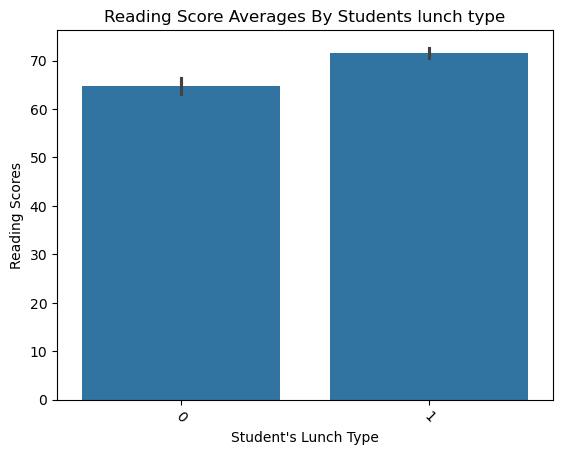

In [525]:
#creating a barchart to display the average writing score by the lunch type students eat
sns.barplot(x=StudentsData['lunch'], y=StudentsData['reading_score'])
plt.xticks(rotation=-45)
plt.ylabel("Reading Scores")
plt.title("Reading Score Averages By Students lunch type")
plt.xlabel("Student's Lunch Type")
plt.show()

<ul>
    <li>0 = free/reduced</li>
    <li>1 = Standard</li>
</ul>
<p><strong> According to the bar chart I created, students who receive the standard lunch are achieving a higher reading score average of around 72 compared  to the students who receive the free/reduced lunch achieved an average reading score of around 63</strong></p>

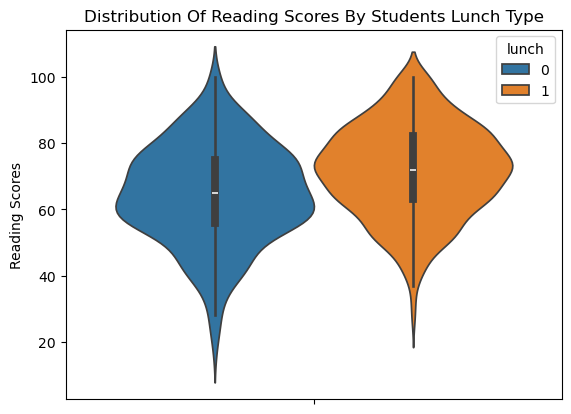

In [513]:
#creating a violinplot to display the distribution of reading scores by the lunch type students eat.
sns.violinplot(y =StudentsData["reading_score"], hue=StudentsData["lunch"])
plt.ylabel("Reading Scores")
plt.title("Distribution Of Reading Scores By Students Lunch Type")

plt.show()

<ul>
    <li>0 = free/reduced</li>
    <li>1 = Standard</li>
</ul>
<p><strong> The highest frquency of students who have the standard lunch achieved reading scores at around the 75-80 mark compared to the highest frequency of students who received the free/reduced achieved reading scores at around the 60-70 mark. </strong></p>

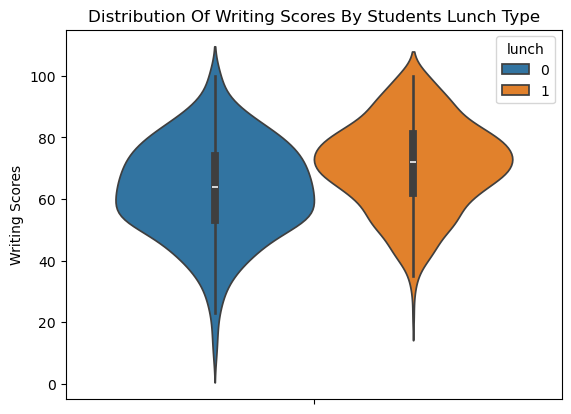

In [511]:
#creating a violinplot to display the distribution of writing scores by the lunch type students eat.
sns.violinplot(y =StudentsData["writing_score"], hue=StudentsData["lunch"])
plt.ylabel("Writing Scores")
plt.title("Distribution Of Writing Scores By Students Lunch Type")

plt.show()

<ul>
    <li>0 = free/reduced</li>
    <li>1 = Standard</li>
</ul>
<p><strong> The high frquency of students who have the standard lunch achieved writing scores between the 70 - 80 mark compared to students who had the free/reduced lunch who have a high frequency of students achieved writing scores between the 60-75 mark.   </strong></p>

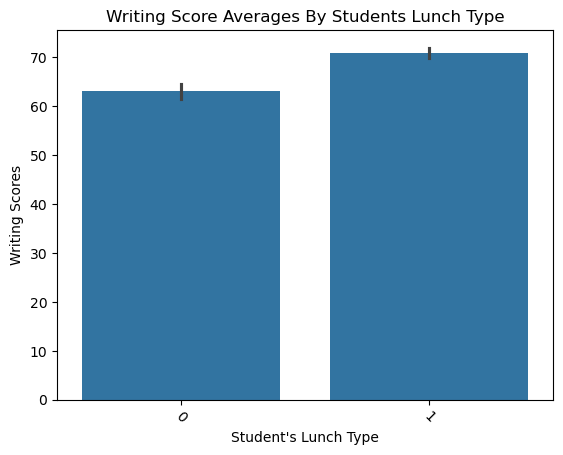

In [527]:
#creating a barchart to display the average writing scores by the lunch type students eat
sns.barplot(x=StudentsData['lunch'], y=StudentsData['writing_score'])
plt.xticks(rotation=-45)
plt.ylabel("Writing Scores")
plt.title("Writing Score Averages By Students Lunch Type")
plt.xlabel("Student's Lunch Type")
plt.show()

<ul>
    <li>0 = free/reduced</li>
    <li>1 = Standard</li>
</ul>
<p><strong> According to the bar chart I created, students who receive the standard lunch are achieving a higher writing score average of around 70 compared  to the students who receive the free/reduced lunch achieved an average writing score of around 63</strong></p>

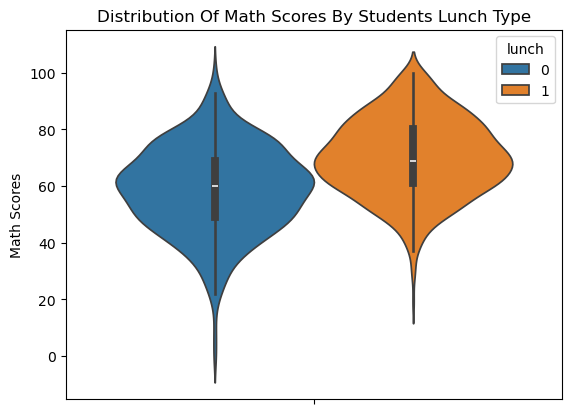

In [509]:
#creating a violinplot to display the distribution of math scores by the lunch type students eat.
sns.violinplot(y =StudentsData["math_score"], hue=StudentsData["lunch"])
plt.ylabel("Math Scores")
plt.title("Distribution Of Math Scores By Students Lunch Type")

plt.show()

<ul>
    <li>0 = free/reduced</li>
    <li>1 = Standard</li>
</ul>
<p><strong> The violin graph widens significantly at around the the 60 mark for students who had the free/reduced lunch while the violin graph for students who had the standard lunch widens significantly at around the 65 mark. It seems that most students who had the free/reduced lunch achieved a math score of around 60 while most students who had the standard lunch achieved a math score of around 65.    </strong></p>

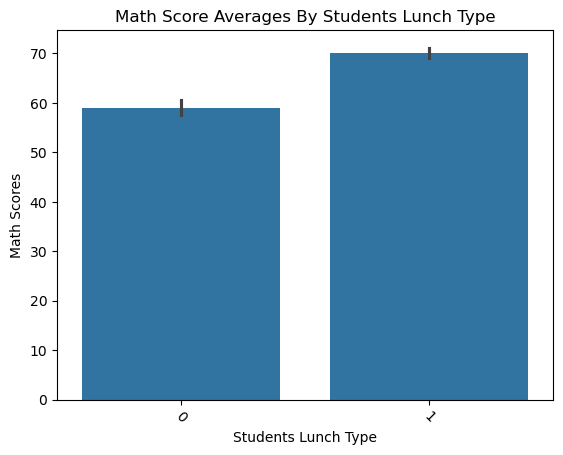

In [500]:
#creating a barchart to display the average math scores by the lunch type students eat
sns.barplot(x=StudentsData['lunch'], y=StudentsData['math_score'])
plt.xticks(rotation=-45)
plt.ylabel("Math Scores")
plt.title("Math Score Averages By Students Lunch Type")
plt.xlabel("Students Lunch Type")
plt.show()

<ul>
    <li>0 = free/reduced</li>
    <li>1 = Standard</li>
</ul>
<p><strong> According to the bar chart I created, students who receive the standard lunch are achieving a higher math score average of around 70 compared  to the students who receive the free/reduced lunch achieved an average math score of around 59</strong></p>

<p><strong>It looks like students who have the standard lunch are achieving higher reading, writing and math scores.</strong></p>

<h2> Is The Test Preparation Course effective on achieveing good results?</h2>

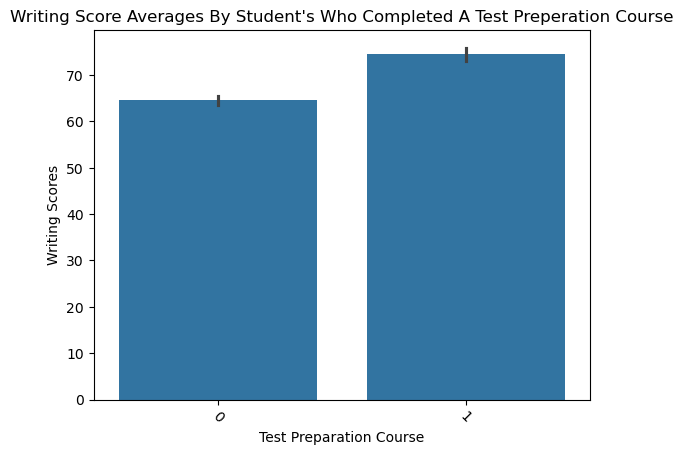

In [537]:
#creating a barchart to display the average writing scores by students who did a test preparation course.
sns.barplot(x=StudentsData['test_preparation_course'], y=StudentsData['writing_score'])
plt.xticks(rotation=-45)
plt.ylabel("Writing Scores")
plt.title("Writing Score Averages By Student's Who Completed A Test Preperation Course")
plt.xlabel("Test Preparation Course")
plt.show()

<ul>
    <li>0 = none</li>
    <li>1 = completed</li>
</ul>
<p><strong> According to the bar chart I created, students who completed a test preparation course are achieving a higher writing score average of around 74 compared  to the students who didn't achieved an average writing score of around 64</strong></p>

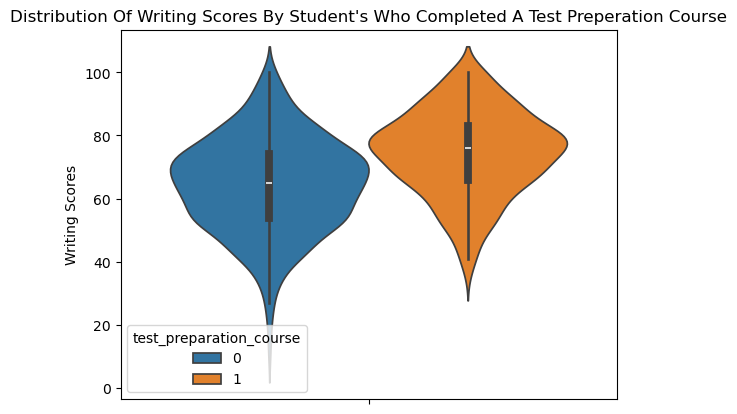

In [539]:
sns.violinplot(y =StudentsData["writing_score"], hue=StudentsData["test_preparation_course"])
plt.ylabel("Writing Scores")
plt.title("Distribution Of Writing Scores By Student's Who Completed A Test Preperation Course")
plt.show()

<ul>
    <li>0 = none</li>
    <li>1 = completed</li>
</ul>
<p><strong> According to the violin I created, the violin graph for students who completed the test preparation course gets significantly wider between the 70 - 80 mark which means there is many students achieving between 70 - 80 in their writing scores while the violin graph for students who didn't complete the test prepartion course is significantly wider between the 55 and 70 mark which means the majority of students achieve around 55 - 70 in their writing scores </strong></p>

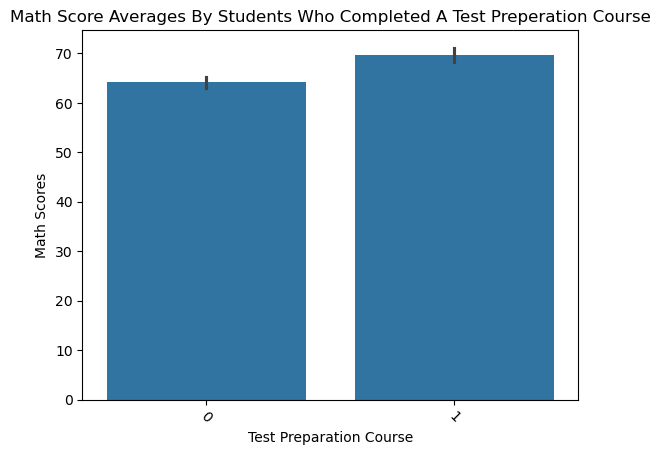

In [541]:
sns.barplot(x=StudentsData['test_preparation_course'], y=StudentsData['math_score'])
plt.xticks(rotation=-45)
plt.ylabel("Math Scores")
plt.title("Math Score Averages By Students Who Completed A Test Preperation Course")
plt.xlabel("Test Preparation Course")
plt.show()

<ul>
    <li>0 = none</li>
    <li>1 = completed</li>
</ul>
<p><strong> According to the bar chart I created, students who completed a test preparation course are achieving a higher math score average of around 69 compared  to the students who didn't achieved an average math score of around 63</strong></p>

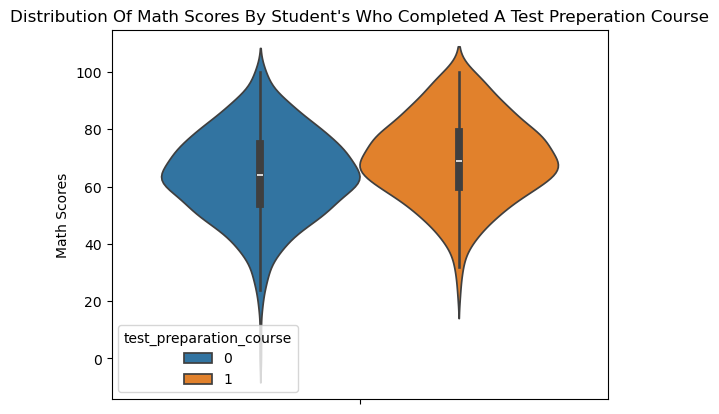

In [543]:
sns.violinplot(y=StudentsData['math_score'], hue=StudentsData['test_preparation_course'])
plt.ylabel("Math Scores")
plt.title("Distribution Of Math Scores By Student's Who Completed A Test Preperation Course")

plt.show()

<ul>
    <li>0 = none</li>
    <li>1 = completed</li>
</ul>
<p><strong> According to the violin I created, the violin graph for students who completed the test preparation course gets significantly wider between the 60 - 70 range which means there is many students achieving between 60 - 70 in their math scores while the violin graph for students who didn't complete the test prepartion course is significantly wider between the 60 and 65 range which means the majority of students achieve around 60 - 65 in their math scores </strong></p>

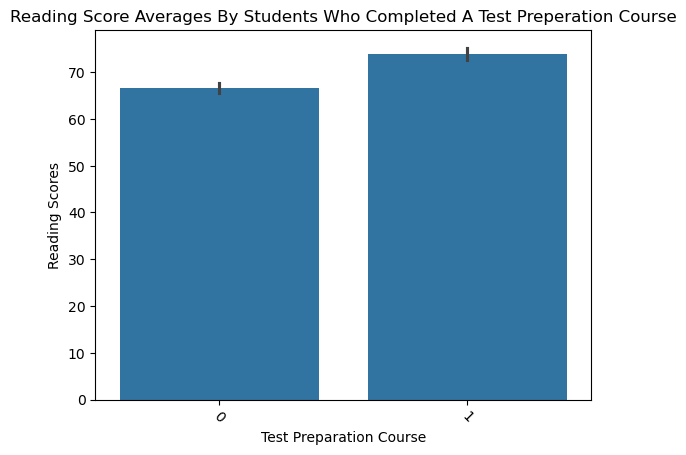

In [547]:
sns.barplot(x=StudentsData['test_preparation_course'], y=StudentsData['reading_score'])
plt.xticks(rotation=-45)
plt.ylabel("Reading Scores")
plt.title("Reading Score Averages By Students Who Completed A Test Preperation Course")
plt.xlabel("Test Preparation Course")
plt.show()

<ul>
    <li>0 = none</li>
    <li>1 = completed</li>
</ul>
<p><strong> According to the bar chart I created, students who completed a test preparation course are achieving a higher reading score average of around 73 compared  to the students who didn't achieved an average reading score of around 67</strong></p>

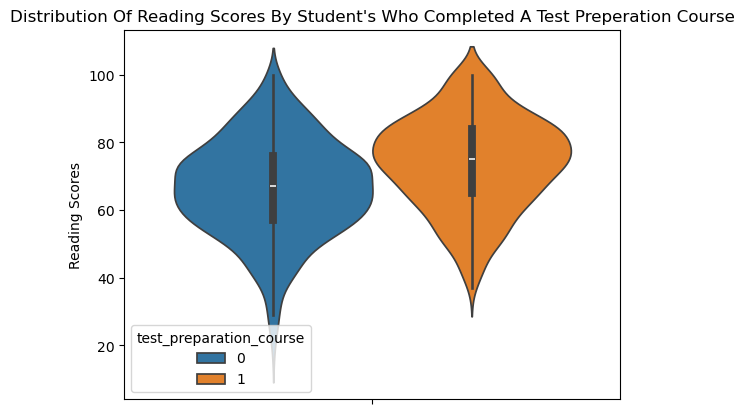

In [545]:
sns.violinplot(y=StudentsData['reading_score'], hue=StudentsData['test_preparation_course'])
plt.ylabel("Reading Scores")
plt.title("Distribution Of Reading Scores By Student's Who Completed A Test Preperation Course")
plt.show()


<ul>
    <li>0 = none</li>
    <li>1 = completed</li>
</ul>
<p><strong> The violin graph for students who completed the test preparation course gets significantly wider between the 75 - 80 mark which means there is many students achieving between 75 - 80 in their reading scores while the violin graph for students who didn't complete the test prepartion course is significantly wider between the 60 and 70 range which means that the majority of students achieve around 60 - 70 in their reading scores </strong></p>

<p><strong>It seems that students who complete the test preparation course tend to achieve better results in their reading, writing and math scores. </strong></p>

<h2> Model Building To Predict Each Subject Score</h2>

<p><strong>I decided to build Linear and Multivariate regression models to try and predict the scores for reading, writing and maths </strong></p>

<p><strong> I created a pairgrid below to display all of the variables to see which one has a good linear relationship with each subject.</strong></p>

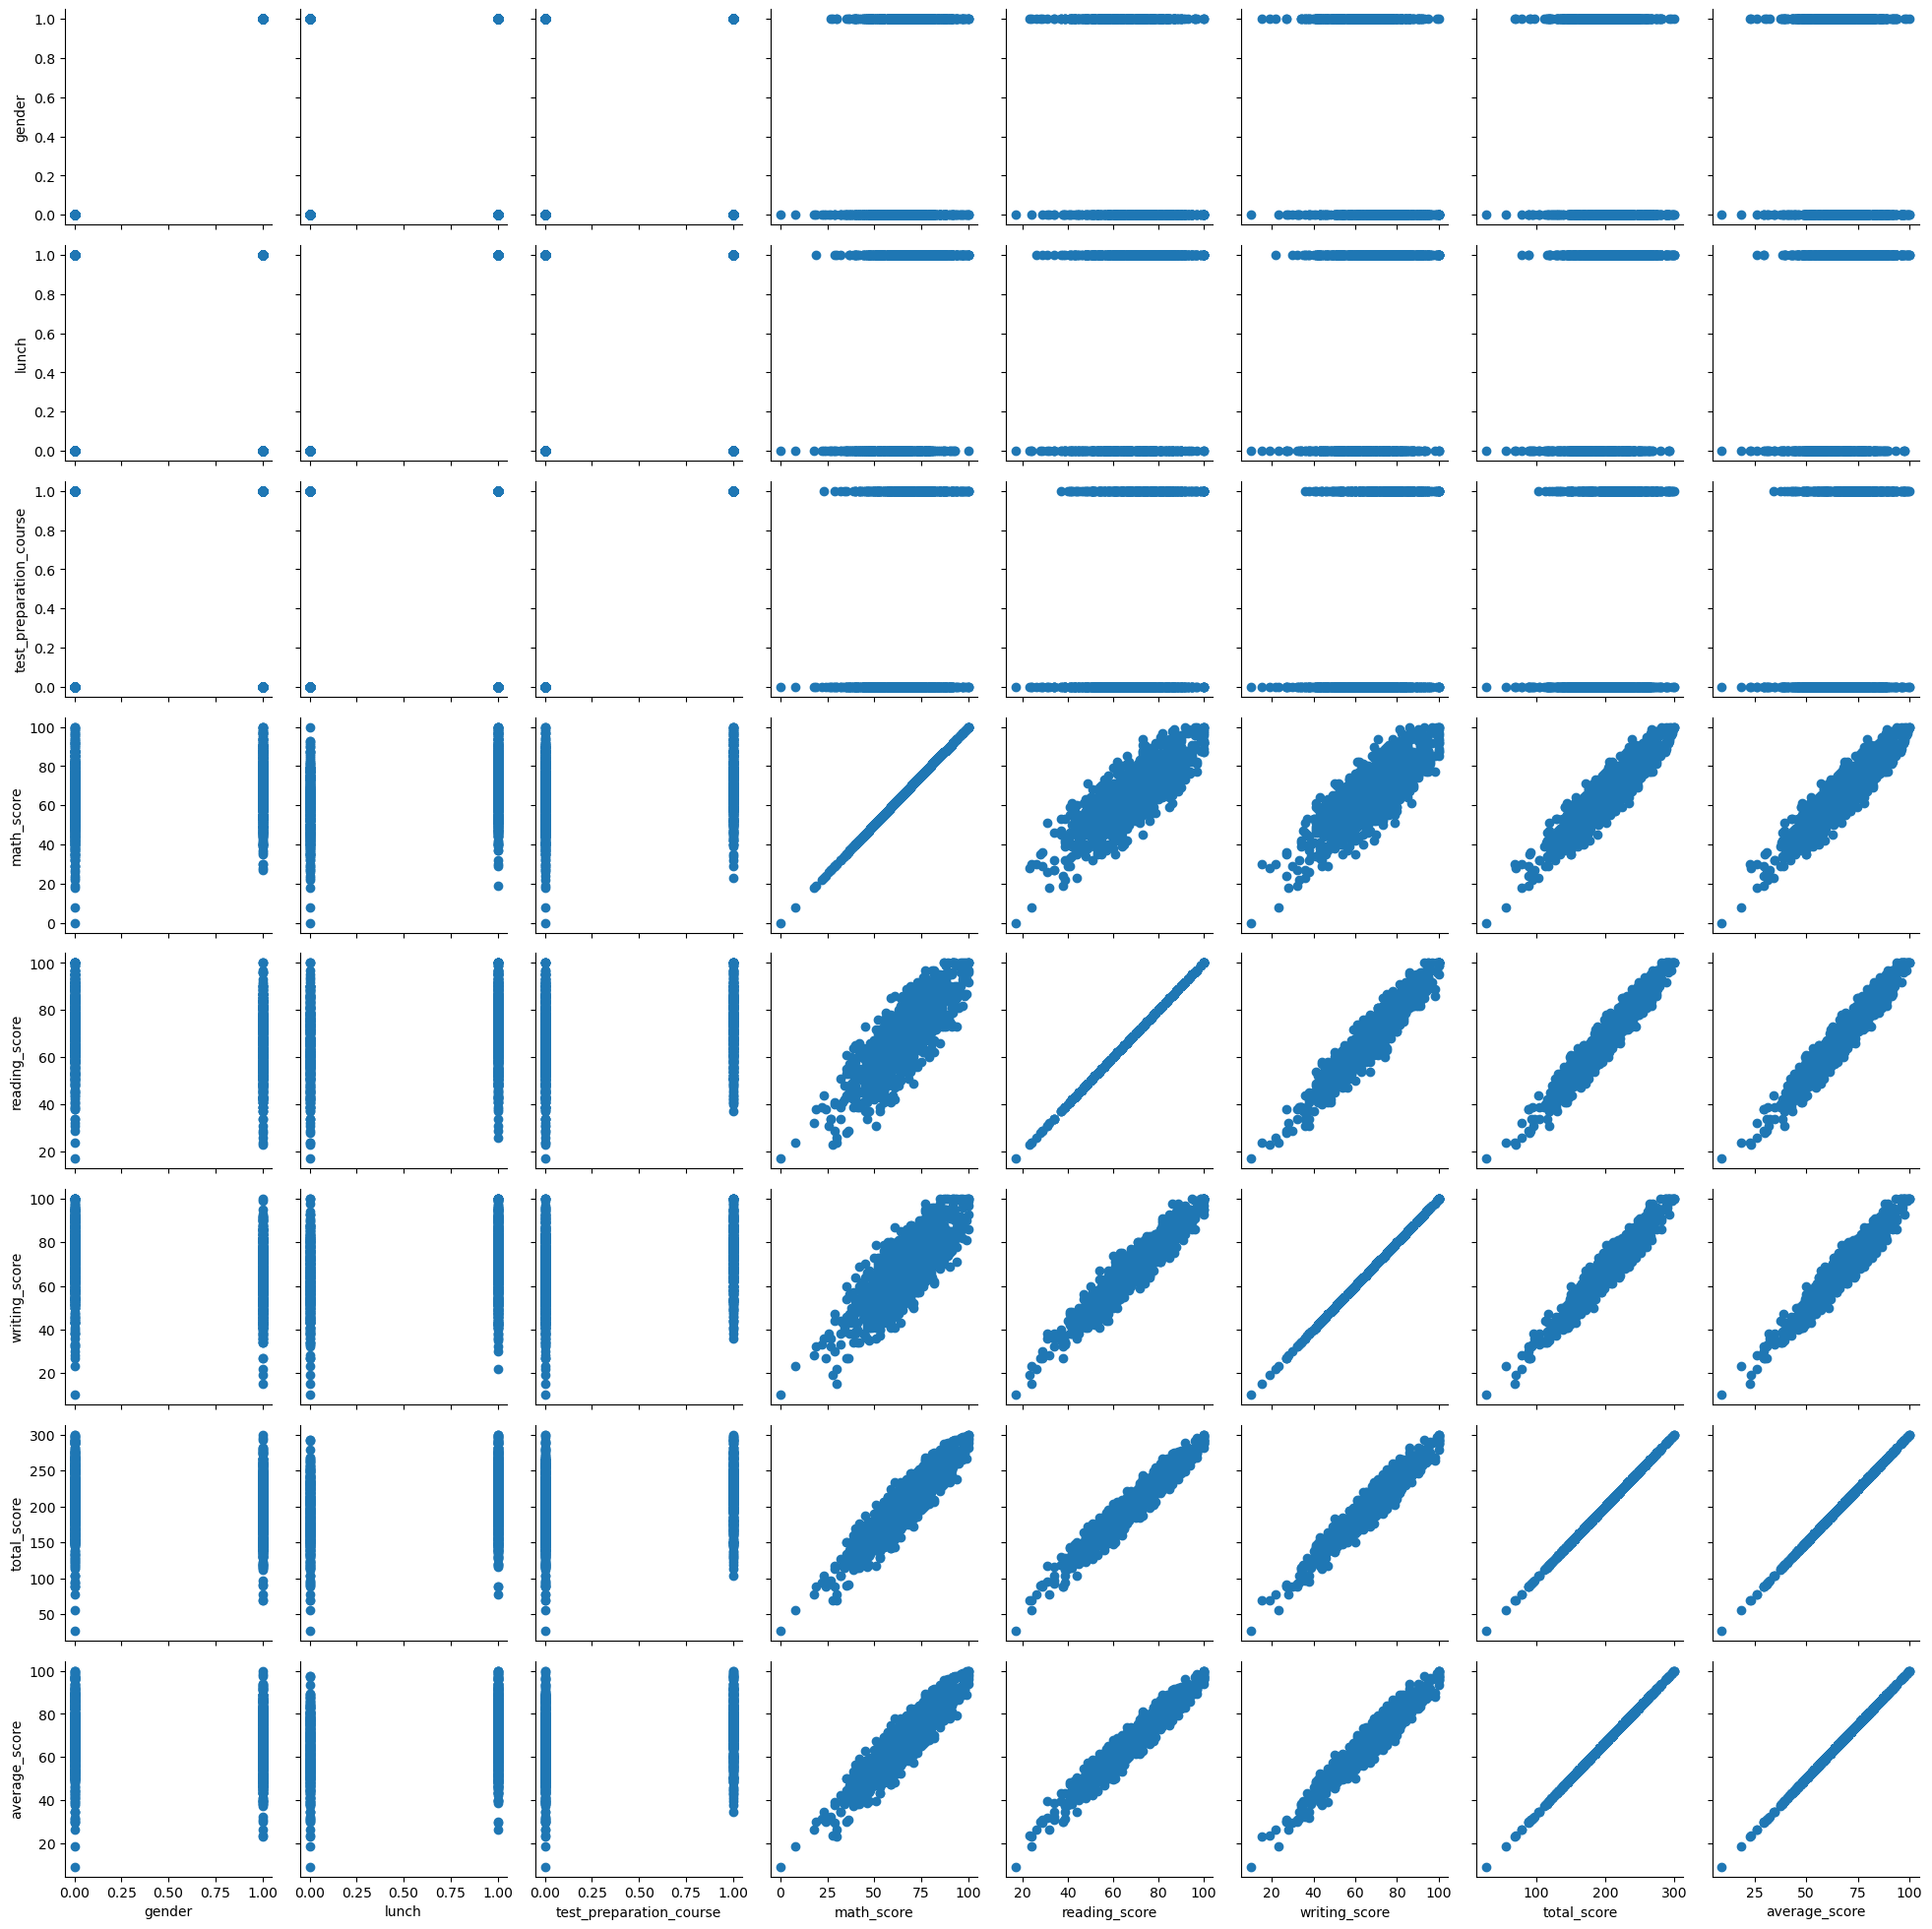

In [199]:
#creating a PairGrid with all of the variables below.
sns.PairGrid(StudentsData).map(plt.scatter) 


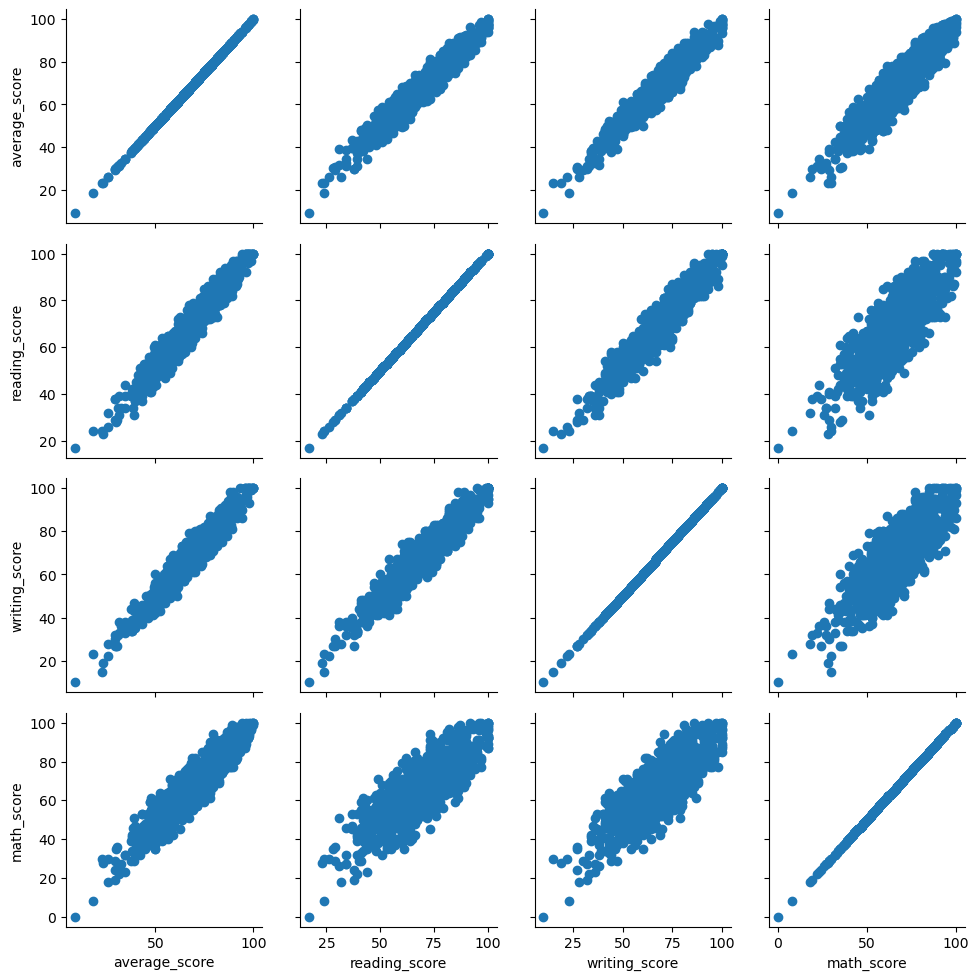

In [200]:
sns.PairGrid(StudentsData, vars=["average_score", "reading_score","writing_score", "math_score" ]).map(plt.scatter)

<p><strong>By observing the two pair grids I created above, I decided to use the average_score as the indpendent variable for the linear regression models for each subject as it has a really strong positive relationship with reading, writing and math scores.</strong>

In [202]:
#X is the independent variable - average score
X = StudentsData[["average_score"]]
#Y is the dependent variable - reading score
y = StudentsData[["reading_score"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
MV_reg = LinearRegression()

#Fit the regressor to the training data
MV_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
MV_pred = MV_reg.predict(X_test)

# Compute and print RMSE between our predicted reading score and actual reading score
rmse = np.sqrt(mean_squared_error(y_test, MV_pred))



print("score:",MV_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",MV_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",MV_reg.intercept_)
print("rmse: ",rmse)

score: 0.9413517782474354
coef_: [[1.00777258]]
intercept_: [0.8670312]
rmse:  3.2261322442228826


<p><strong>The r^2 of the model has a score of 0.941 which is very high and has a low RMSE value of 3.226 which means it is a very accurate model. it has a coefficient of 1.01 meaning that it has a positive slope meaning that as the average score increases, the reading score increases. </strong></p>

In [204]:
#X is the independent variable - Distance
X = StudentsData[["average_score"]]
#Y is the dependent variable - Cost
y = StudentsData[["writing_score"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
MV_reg = LinearRegression()

#Fit the regressor to the training data
MV_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
MV_pred = MV_reg.predict(X_test)

# Compute and print RMSE between our predicted writing_score and actual writing_score
rmse = np.sqrt(mean_squared_error(y_test, MV_pred))



print("score:",MV_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",MV_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",MV_reg.intercept_)
print("rmse: ",rmse)

score: 0.932501039152893
coef_: [[1.03010066]]
intercept_: [-1.80810034]
rmse:  3.916699646080401


<p><strong>The r^2 of the model has a score of 0.933 which is very high and has a low RMSE value of 3.917 which means it is a very accurate model. it has a coefficient of 1.02 meaning that it has a positive slope meaning that as the average score increases, the writing score increases. </strong></p>

In [206]:
#X is the independent variable - Distance
X = StudentsData[["average_score"]]
#Y is the dependent variable - Cost
y = StudentsData[["math_score"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
MV_reg = LinearRegression()

#Fit the regressor to the training data
MV_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
MV_pred = MV_reg.predict(X_test)

# Compute and print RMSE between our predicted math_score and actual math_score
rmse = np.sqrt(mean_squared_error(y_test, MV_pred))



print("score:",MV_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",MV_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",MV_reg.intercept_)
print("rmse: ",rmse)

score: 0.8439775151461679
coef_: [[0.96567891]]
intercept_: [0.6567273]
rmse:  5.468842529122779


<p><strong>The r^2 of the model has a score of 0.844 which is very high and has a low RMSE value of 5.469 which means it is a very accurate model. it has a coefficient of 0.966 meaning that it has a positive slope meaning that as the average score increases, the math score increases. </strong></p>

<p><strong>The linear regression model to predict the reading score is the most accurate out of the three linear regression models as it has the highest r^2 score and the lowest RMSE value.</strong></p>

<h3>Multivariate Regression Model Building To Predict Reading, Writing and Math scores.</h3>

<p><strong>For the multivariate regression models, I decided to add all of the indepndent variables into each model to predict the reading, writing and maths scores. Some of these variables were categorical data so I used dummy variables for the models. </strong></p>

<h3>Maths score Multivariate Regression Model</h3>

In [553]:
#creating dummy variables for the parental_level_of_education and race_ethnicity variables
categorical_encoding_StudentsData = pd.get_dummies(StudentsData[["parental_level_of_education","race_ethnicity"]])
Maths_model_building_Students_Data=StudentsData.join(categorical_encoding_StudentsData)
Maths_model_building_Students_Data.drop(columns={"parental_level_of_education", "race_ethnicity"}, inplace=True)

#normalising the data
normalised_scores=Maths_model_building_Students_Data[["math_score","reading_score", "total_score", "writing_score", "average_score"]]
normalised_scores=(normalised_scores-normalised_scores.min())/(normalised_scores.max()-normalised_scores.min())

Maths_model_building_Students_Data["reading_score"]=normalised_scores["reading_score"]
Maths_model_building_Students_Data["writing_score"]=normalised_scores["writing_score"]
Maths_model_building_Students_Data["total_score"]=normalised_scores["total_score"]
Maths_model_building_Students_Data["average_score"]=normalised_scores["average_score"]
Maths_model_building_Students_Data["math_score"]=normalised_scores["math_score"]



#X is the independent variable - all columns except maths score as it is the target variable 
X = Maths_model_building_Students_Data.loc[:, Maths_model_building_Students_Data.columns != 'math_score']
#Y is the dependent variable - Cost
y = Maths_model_building_Students_Data[["math_score"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
MV_reg = LinearRegression()

#Fit the regressor to the training data
MV_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
MV_pred = MV_reg.predict(X_test)

# Compute and print RMSE between our predicted maths score and actual maths score
rmse = np.sqrt(mean_squared_error(y_test, MV_pred))



print("score:",MV_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",MV_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",MV_reg.intercept_)
print("rmse: ",rmse)



score: 1.0
coef_: [[-6.28479038e-17  1.39634097e-17  8.26264406e-16 -8.30000000e-01
  -9.00000000e-01  1.13600875e+00  1.59399125e+00 -4.28523067e-02
  -4.28523067e-02 -4.28523067e-02 -4.28523067e-02 -4.28523067e-02
  -4.28523067e-02  4.63943837e-02  4.63943837e-02  4.63943837e-02
   4.63943837e-02  4.63943837e-02]]
intercept_: [-0.00354208]
rmse:  5.6886404776151015e-16


<p><strong>The r^2 of the model has a score of 1.0 which is a perfect score and a very low RMSE value which means it is a very accurate model. the coefficents are very small even though I normalised the data. </strong></p>

<h3>Reading score Multivariate Regression Model</h3>

In [214]:

categorical_encoding_StudentsData = pd.get_dummies(StudentsData[["parental_level_of_education","race_ethnicity"]])
Reading_model_building_Students_Data=StudentsData.join(categorical_encoding_StudentsData)
Reading_model_building_Students_Data.drop(columns={"parental_level_of_education", "race_ethnicity"}, inplace=True)
normalised_scores=Reading_model_building_Students_Data[["math_score","reading_score", "total_score", "writing_score", "average_score"]]
normalised_scores=(normalised_scores-normalised_scores.min())/(normalised_scores.max()-normalised_scores.min())

Reading_model_building_Students_Data["reading_score"]=normalised_scores["reading_score"]
Reading_model_building_Students_Data["writing_score"]=normalised_scores["writing_score"]
Reading_model_building_Students_Data["total_score"]=normalised_scores["total_score"]
Reading_model_building_Students_Data["average_score"]=normalised_scores["average_score"]
Reading_model_building_Students_Data["math_score"]=normalised_scores["math_score"]



#X is the independent variable - Distance
X = Maths_model_building_Students_Data.loc[:, Maths_model_building_Students_Data.columns != 'math_score']
#Y is the dependent variable - Cost
y = Maths_model_building_Students_Data[["reading_score"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
MV_reg = LinearRegression()

#Fit the regressor to the training data
MV_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
MV_pred = MV_reg.predict(X_test)

# Compute and print RMSE between our predicted reading score and actual reading score
rmse = np.sqrt(mean_squared_error(y_test, MV_pred))



print("score:",MV_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",MV_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",MV_reg.intercept_)
print("rmse: ",rmse)

score: 1.0
coef_: [[-3.14585256e-17  2.30203948e-16  2.18598674e-17  1.00000000e+00
  -8.70134762e-16  4.52853651e-03 -4.52853651e-03  4.70923995e-03
   4.70923995e-03  4.70923995e-03  4.70923995e-03  4.70923995e-03
   4.70923995e-03 -1.08283390e-02 -1.08283390e-02 -1.08283390e-02
  -1.08283390e-02 -1.08283390e-02]]
intercept_: [0.0061191]
rmse:  1.9067191602382835e-16


<p><strong>The r^2 of the model has a score of 1.0 which is a perfect score and a very low RMSE value which means it is a very accurate model. the coefficents are very small even though I normalised the data. </strong></p>

<h3>Writing Score Multivariate Regression Model</h3>

In [556]:

Writing_model_building_Students_Data=StudentsData.join(categorical_encoding_StudentsData)
Writing_model_building_Students_Data.drop(columns={"parental_level_of_education", "race_ethnicity"}, inplace=True)
normalised_scores=Writing_model_building_Students_Data[["math_score","reading_score", "total_score", "writing_score", "average_score"]]
normalised_scores=(normalised_scores-normalised_scores.min())/(normalised_scores.max()-normalised_scores.min())

Writing_model_building_Students_Data["reading_score"]=normalised_scores["reading_score"]
Writing_model_building_Students_Data["writing_score"]=normalised_scores["writing_score"]
Writing_model_building_Students_Data["total_score"]=normalised_scores["total_score"]
Writing_model_building_Students_Data["average_score"]=normalised_scores["average_score"]
Writing_model_building_Students_Data["math_score"]=normalised_scores["math_score"]



#X is the independent variable - Distance
X = Maths_model_building_Students_Data.loc[:, Maths_model_building_Students_Data.columns != 'writing_score']
#Y is the dependent variable - Cost
y = Maths_model_building_Students_Data[["writing_score"]]

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create the regressor: reg
MV_reg = LinearRegression()

#Fit the regressor to the training data
MV_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
MV_pred = MV_reg.predict(X_test)

# Compute and print RMSE between our predicted writing and actual writing score
rmse = np.sqrt(mean_squared_error(y_test, MV_pred))



print("score:",MV_reg.score(X, y)) #Return the coefficient of determination of the prediction.
print("coef_:",MV_reg.coef_)#Estimated coefficients for the linear regression problem. 
print("intercept_:",MV_reg.intercept_)
print("rmse: ",rmse)



score: 1.0
coef_: [[ 4.55396551e-16 -4.23756545e-16 -4.29519675e-16 -1.11111111e+00
  -9.22222222e-01  1.55134323e+00  1.48199010e+00  1.32220038e-02
   1.32220038e-02  1.32220038e-02  1.32220038e-02  1.32220038e-02
   1.32220038e-02 -1.28211810e-01 -1.28211810e-01 -1.28211810e-01
  -1.28211810e-01 -1.28211810e-01]]
intercept_: [0.11498981]
rmse:  6.16525311527604e-16


<p><strong>The r^2 of the model has a score of 1.0 which is a perfect score and a very low RMSE value which means it is a very accurate model. the coefficents are very small even though I normalised the data. </strong></p>

<h2> Decision Tree to predict Students Race Ethnicity</h2>

<p> <strong> I wanted to build a decision tree to predict the Race Ethnicity of a Student. I used all of the variables besided the race_ethnicty since it is the target variable.</strong></p>

Test Accuracy: 0.29


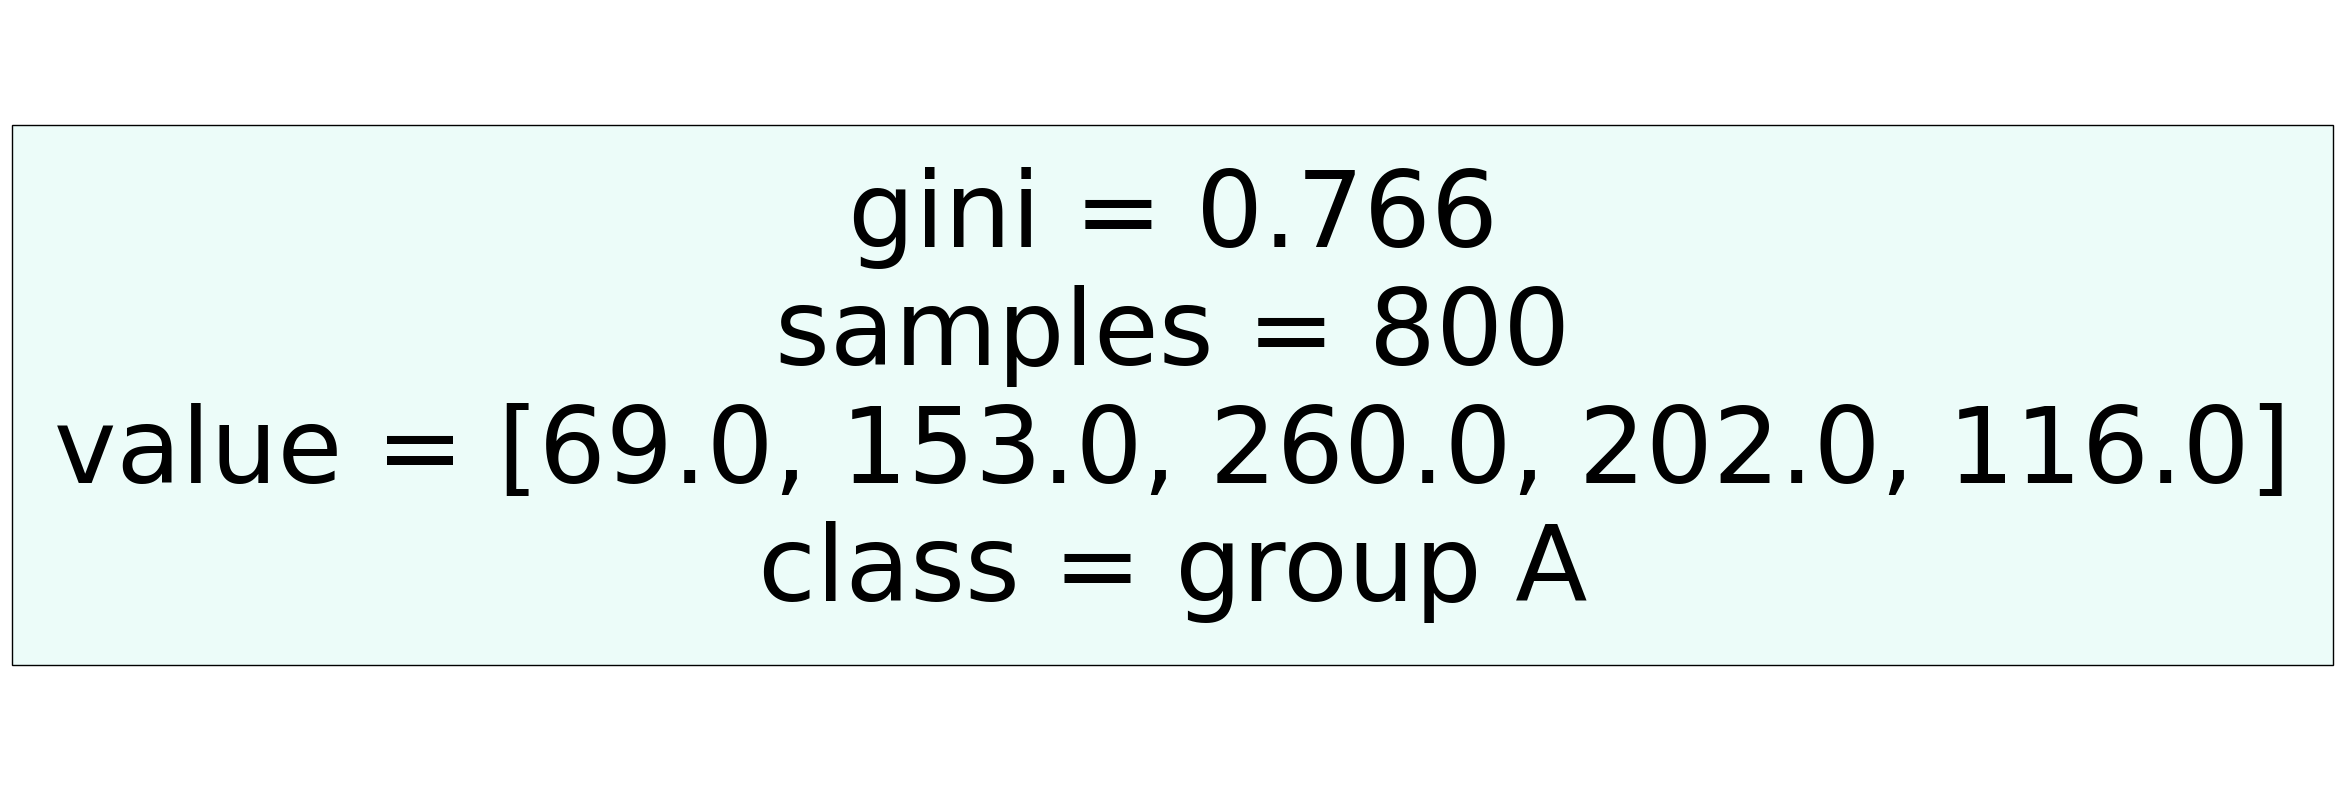

              precision    recall  f1-score   support

     group A       0.00      0.00      0.00        20
     group B       0.00      0.00      0.00        37
     group C       0.29      1.00      0.46        59
     group D       0.00      0.00      0.00        60
     group E       0.00      0.00      0.00        24

    accuracy                           0.29       200
   macro avg       0.06      0.20      0.09       200
weighted avg       0.09      0.29      0.13       200



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [558]:
#creating dummy variables for the parentel level of education column
categorical_encoding_StudentsData = pd.get_dummies(StudentsData[["parental_level_of_education"]])
Decision_Tree_building_Students_Data=StudentsData.join(categorical_encoding_StudentsData)
Decision_Tree_building_Students_Data.drop(columns={"parental_level_of_education"}, inplace=True)

#normalising all the numerical values
normalised_scores=Decision_Tree_building_Students_Data[["math_score","reading_score", "total_score", "writing_score", "average_score"]]
normalised_scores=(normalised_scores-normalised_scores.min())/(normalised_scores.max()-normalised_scores.min())

Decision_Tree_building_Students_Data["reading_score"]=normalised_scores["reading_score"]
Decision_Tree_building_Students_Data["writing_score"]=normalised_scores["writing_score"]
Decision_Tree_building_Students_Data["total_score"]=normalised_scores["total_score"]
Decision_Tree_building_Students_Data["average_score"]=normalised_scores["average_score"]
Decision_Tree_building_Students_Data["math_score"]=normalised_scores["math_score"]

#building the decision tree
Decision_Tree=Decision_Tree_building_Students_Data.loc[:, Decision_Tree_building_Students_Data.columns != 'race_ethnicity']
X_train, X_test, y_train, y_test = train_test_split(Decision_Tree, Decision_Tree_building_Students_Data.race_ethnicity, test_size=0.2, random_state=42)
#pruning the decision tree
Race_decision_tree = DecisionTreeClassifier( random_state=42,ccp_alpha=0.01)
Race_decision_tree.fit(X_train, y_train)



param_grid = {'ccp_alpha': np.linspace(0, 0.02, 50)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)



optimal_tree = grid_search.best_estimator_
y_test_pred_optimal = optimal_tree.predict(X_test)
optimal_test_accuracy = accuracy_score(y_test, y_test_pred_optimal)
#printing the accuracy of the decision tree
print(f"Test Accuracy: {optimal_test_accuracy:.2f}")

#visualizing the decision tree
plt.figure(figsize=(30,10))
tree_plot = plot_tree(optimal_tree, feature_names=Decision_Tree.columns, class_names=Decision_Tree_building_Students_Data.race_ethnicity.unique(), filled=True)
plt.show()


#print accuracy report
print(classification_report(y_test, y_test_pred_optimal))

<p><strong>The decision tree has an accuracy of 29% which is very low. According to the accuracy report, the decision tre was only able to predict all instances of Group C correctly since it has a recall value of 1.0 but also made a lot of false predictions for Group C as it has a precision value 0.29. The decision tree was not able to predict the rest of the groups as all of their values are zero. </strong></p>

<h2> Students Exam Performance Exams Conclusion. </h2>

<p>
    I enjoyed working on this dataset as it was a bit more compact and easier to work with compared to the college basketball dataset. 
</p>

<p>
    I discovered that the Parents of students who have a Masters degree achieved the highest reading, writing, math average scores and overall average scores. The parents of students who only completed high school had the lowest highest reading, writing and math average scores. It looked like that the higher level of education that the students parents received had a more positive impact on their childrens exam performance.
</p>

<p> I also found that male students achieved better reading and writing scores than female students but females avhieved better math scores.</p>

<p>
    I looked into the impact of what type of lunch the students received and what impact it had on their exam performnace. I found that students who received the standard lunch performed better in their reading, writing and math exams than students who received the free/reduced lunch.
</p>

<p>I also wanted to see if students performed better if they completed a test preparation course which seemed to be true as they did have better score averages in reading, writing and maths exams than students who didn't complete a test preparation course.</p>

<p>
    I built linear regression models to predict the scores for reading, writing and maths, I used the average score as the indpendent variable as I thought it had the strongest linear relationship with each subject. These models were pretty acurate going by their r^2 scores and low RMSE values.
</p>

<p>
    I also built multivariate regression models to predict the scores for reading, writing and math scores using all of the independent variables in the dataset. These models had a perfect r^2 score of 1.0 and really low RMSE values. the weights were hard to read as the coefficient values were really small even though I normalised all of the numerical variables.
    
</p>

<p>
    I also built a decision tree to try and predict a students race ethnicity. The decison tree had an accuracy of 29% and was only able to predict the group C class and couldnt predict the other classes. I was a bit dissapointed with the decision tree accuracy as I thought it would be more accurate.
</p>

<p> Working in this students exam performance dataset has been really been beneficial to me as it allowed me to practice my data preprocessing, data exploration, linear and multi variate regression model building and decision tree building skills.</p>